In [2]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import pyreadr
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
# check version number
import imblearn
print(imblearn.__version__)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance

ModuleNotFoundError: No module named 'seaborn'

In [5]:
# Import Wallen species data into a dataframe
import pyreadr
!curl -L -o Wallen_PD_species_bias_corrected_abund.rds "https://github.com/maevekrueger/UFPF_metagenomics/raw/main/HMP2_Payami/ANCOMBC2/Wallen%20PD%20species%20bias%20corrected%20abund.rds"
X = pyreadr.read_r('Wallen_PD_species_bias_corrected_abund.rds')
X
df_wallenspecies = X[None]
df_wallenspecies

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  535k  100  535k    0     0   733k      0 --:--:-- --:--:-- --:--:-- 8494k


,Actinomyces_graevenitzii,Actinomyces_naeslundii,Actinomyces_odontolyticus,Actinomyces_oris,Actinomyces_sp_HMSC035G02,Actinomyces_sp_HPA0247,Actinomyces_sp_ICM47,Bifidobacterium_adolescentis,Bifidobacterium_bifidum,Bifidobacterium_breve,...,Parasutterella_excrementihominis,Turicimonas_muris,Bilophila_wadsworthia,Escherichia_coli,Klebsiella_pneumoniae,Klebsiella_quasipneumoniae,Klebsiella_variicola,Proteobacteria_bacterium_CAG_139,Cloacibacillus_evryensis,Akkermansia_muciniphila
rownames,,,,,,,,,,,,,,,,,,,,,
DP310,1.335852,1.335852,1.335852,1.335852,1.335852,1.335852,1.335852,1.335852,7.326349,1.335852,...,1.335852,1.335852,10.580071,1.335852,1.335852,1.335852,1.335852,1.335852,1.335852,1.335852
DP309,1.330568,1.330568,7.318854,1.330568,1.330568,1.330568,8.888970,14.204578,8.417263,1.330568,...,12.713518,1.330568,10.165548,1.330568,1.330568,1.330568,1.330568,9.631463,1.330568,1.330568
DP308,0.019005,8.527073,0.019005,0.019005,0.019005,0.019005,0.019005,8.072993,5.926733,0.019005,...,7.521074,7.752249,10.491441,10.744833,0.019005,0.019005,0.019005,0.019005,0.019005,0.019005
DP307,1.075558,1.075558,6.276516,1.075558,1.075558,1.075558,1.075558,15.330264,15.745026,13.978348,...,1.075558,1.075558,11.075754,12.458172,1.075558,1.075558,1.075558,1.075558,1.075558,13.488807
DP305,1.549901,10.430962,10.456782,10.431535,9.375408,9.305542,1.549901,1.549901,17.169071,1.549901,...,1.549901,1.549901,1.549901,1.549901,1.549901,1.549901,1.549901,1.549901,1.549901,8.907617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DC172,0.697834,0.697834,0.697834,0.697834,0.697834,0.697834,5.708910,0.697834,0.697834,0.697834,...,0.697834,0.697834,8.934609,0.697834,0.697834,0.697834,0.697834,0.697834,0.697834,0.697834
DC171,2.496452,10.371394,10.707181,9.310102,9.753656,2.496452,10.915962,2.496452,2.496452,2.496452,...,2.496452,2.496452,2.496452,15.233263,12.537578,2.496452,11.213404,2.496452,2.496452,2.496452
DC170,-0.377156,-0.377156,-0.377156,-0.377156,-0.377156,-0.377156,-0.377156,8.348349,6.903759,-0.377156,...,9.777912,8.139498,8.305352,9.264302,9.212715,-0.377156,-0.377156,11.440984,9.972282,14.695974


In [6]:
# Krueger species data into dataframe
!curl -L -o mybias_corrected_abund_species.rds "https://github.com/maevekrueger/UFPF_metagenomics/raw/main/UFPF/ANCOMBC2/bias%20corrected%20abund%20species.rds"
X = pyreadr.read_r('mybias_corrected_abund_species.rds')
X
df_kruegerspecies = X[None]
df_kruegerspecies

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 55693  100 55693    0     0  81185      0 --:--:-- --:--:-- --:--:-- 81185


,Corynebacterium_amycolatum,GGB2945_SGB3917,Fenollaria_timonensis,Ezakiella_SGB6726,Varibaculum_cambriense,Porphyromonas_SGB1983,Clostridiales_bacterium_SIT11,Prevotella_buccalis,Collinsella_aerofaciens,Peptoniphilus_grossensis,...,Campylobacter_ureolyticus,Peptoniphilus_gorbachii,Anaerococcus_mediterraneensis,Butyricimonas_virosa,Frisingicoccus_SGB4674,Anaerococcus_murdochii,GGB10524_SGB17049,Streptococcus_anginosus,Erysipelatoclostridium_ramosum,Clostridium_sp_AT4
rownames,,,,,,,,,,,,,,,,,,,,,
UF.PF.2020.001.1N,12.509395,11.205943,11.083608,10.750434,10.344403,10.267765,10.213155,9.971290,9.954662,9.939178,...,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944
UF.PF.2020.001.2G,9.726856,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,6.550526,-1.076126,...,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126
UF.PF.2020.002.2G,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,9.970503,0.965400,...,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400
UF.PF.2020.002.3N,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,9.729585,-1.245590,...,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590
UF.PF.2020.003.1N,-0.215380,-0.215380,12.133021,11.283989,12.033989,-0.215380,-0.215380,10.073939,7.013294,11.005459,...,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UF.PF.2022.103.1N,7.770182,-2.605828,-2.605828,10.062809,5.476099,-2.605828,-2.605828,7.021760,5.528744,9.122015,...,8.279290,6.949750,4.086408,-2.605828,-2.605828,-2.605828,-2.605828,5.700236,5.430622,-2.605828
UF.PF.2023.032.2G,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,10.727153,0.182662,...,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662
UF.PF.2023.119.1N,0.672257,0.672257,0.672257,0.672257,11.037976,0.672257,0.672257,0.672257,0.672257,0.672257,...,0.672257,0.672257,0.672257,0.672257,11.242996,11.556923,0.672257,7.357100,0.672257,0.672257


In [7]:
# Change Krueger index
df_kruegerspecies = df_kruegerspecies.reset_index()
df_kruegerspecies

,rownames,Corynebacterium_amycolatum,GGB2945_SGB3917,Fenollaria_timonensis,Ezakiella_SGB6726,Varibaculum_cambriense,Porphyromonas_SGB1983,Clostridiales_bacterium_SIT11,Prevotella_buccalis,Collinsella_aerofaciens,...,Campylobacter_ureolyticus,Peptoniphilus_gorbachii,Anaerococcus_mediterraneensis,Butyricimonas_virosa,Frisingicoccus_SGB4674,Anaerococcus_murdochii,GGB10524_SGB17049,Streptococcus_anginosus,Erysipelatoclostridium_ramosum,Clostridium_sp_AT4
0,UF.PF.2020.001.1N,12.509395,11.205943,11.083608,10.750434,10.344403,10.267765,10.213155,9.971290,9.954662,...,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944
1,UF.PF.2020.001.2G,9.726856,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,6.550526,...,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126
2,UF.PF.2020.002.2G,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,9.970503,...,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400
3,UF.PF.2020.002.3N,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,9.729585,...,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590
4,UF.PF.2020.003.1N,-0.215380,-0.215380,12.133021,11.283989,12.033989,-0.215380,-0.215380,10.073939,7.013294,...,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380,-0.215380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,UF.PF.2022.103.1N,7.770182,-2.605828,-2.605828,10.062809,5.476099,-2.605828,-2.605828,7.021760,5.528744,...,8.279290,6.949750,4.086408,-2.605828,-2.605828,-2.605828,-2.605828,5.700236,5.430622,-2.605828
92,UF.PF.2023.032.2G,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,10.727153,...,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662,0.182662
93,UF.PF.2023.119.1N,0.672257,0.672257,0.672257,0.672257,11.037976,0.672257,0.672257,0.672257,0.672257,...,0.672257,0.672257,0.672257,0.672257,11.242996,11.556923,0.672257,7.357100,0.672257,0.672257
94,UF.PF.2023.123.1N,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,10.293092,...,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,-0.715695,8.687744,-0.715695


In [5]:
# Rename Krueger rownames column
df_kruegerspecies = df_kruegerspecies.rename(columns = {'rownames':'Sample'})
df_kruegerspecies

,Sample,Corynebacterium_amycolatum,GGB2945_SGB3917,Fenollaria_timonensis,Ezakiella_SGB6726,Varibaculum_cambriense,Porphyromonas_SGB1983,Clostridiales_bacterium_SIT11,Prevotella_buccalis,Collinsella_aerofaciens,Peptoniphilus_grossensis,Corynebacterium_aurimucosum,Mobiluncus_SGB15488,GGB9715_SGB15265,Porphyromonas_SGB1977,Alterileibacterium_massiliense,Peptococcus_niger,Gemmiger_formicilis,Peptoniphilus_sp_Marseille_P3761,GGB1456_SGB2019,Oscillibacter_sp_ER4,Peptoniphilus_pacaensis,Alistipes_putredinis,Ruminococcus_bicirculans,Evtepia_gabavorous,Blautia_obeum,Faecalibacterium_prausnitzii,Phascolarctobacterium_faecium,GGB9512_SGB14909,Porphyromonas_bennonis,Bacteroides_uniformis,Bifidobacterium_adolescentis,Wujia_chipingensis,Dorea_longicatena,Anaerobutyricum_hallii,Lagierella_massiliensis,Clostridiaceae_unclassified_SGB15090,Acidaminococcus_intestini,Barnesiella_intestinihominis,Adlercreutzia_equolifaciens,Mediterraneibacter_faecis,Blautia_faecis,Candidatus_Cibionibacter_quicibialis,Eubacterium_rectale,Faecalicatena_fissicatena,Fusicatenibacter_saccharivorans,Ruminococcus_bromii,Agathobaculum_butyriciproducens,Phocaeicola_vulgatus,Blautia_sp_MCC283,Brotolimicola_acetigignens,Eubacteriales_Family_XIII_Incertae_Sedis_unclassified_SGB3978,GGB9715_SGB15260,Olegusella_massiliensis,GGB4277_SGB5832,Phocaeicola_dorei,Ruminococcus_lactaris,Alistipes_indistinctus,Dorea_formicigenerans,Oscillibacter_valericigenes,Oscillospiraceae_bacterium_CLA_AA_H250,Oliverpabstia_intestinalis,Blautia_wexlerae,Alistipes_communis,Alistipes_shahii,Blautia_massiliensis,Coprococcus_comes,Parabacteroides_merdae,Lawsonella_SGB3665,Phocaeicola_massiliensis,Ruminococcus_torques,Alistipes_onderdonkii,Negativibacillus_massiliensis,GGB3433_SGB4573,Bacteroides_intestinalis,Escherichia_coli,Dysosmobacter_welbionis,Bacteroides_stercoris,Parabacteroides_distasonis,Paraprevotella_clara,GGB3167_SGB4181,Bacteroides_faecis,Monoglobus_pectinilyticus,Streptococcus_parasanguinis,Bacteroides_finegoldii,GGB51647_SGB4348,Clostridiales_bacterium,Eisenbergiella_tayi,Corynebacterium_simulans,Blautia_caecimuris,Lawsonibacter_hominis,Bacteroides_ovatus,Anaerostipes_hadrus,Bacteroides_caccae,Faecalibacterium_sp_CLA_AA_H233,Ruthenibacterium_lactatiformans,Eggerthella_lenta,Bilophila_wadsworthia,Clostridium_sp_AF36_4,Enterocloster_clostridioformis,Clostridium_scindens,Roseburia_inulinivorans,Parasutterella_excrementihominis,Anaerotruncus_massiliensis,Akkermansia_muciniphila,Blautia_hansenii,Clostridium_symbiosum,Enterocloster_hominis,Blautia_hydrogenotrophica,Eubacterium_ramulus,Blautia_producta,Intestinimonas_massiliensis,Ruminococcus_gnavus,Enterocloster_bolteae,Lachnospira_eligens,Neglectibacter_timonensis,Roseburia_hominis,Corynebacterium_tuberculostearicum,Klebsiella_pneumoniae,Porphyromonas_uenonis,Lawsonibacter_asaccharolyticus,Blautia_glucerasea,Roseburia_intestinalis,Roseburia_faecis,Faecalimonas_umbilicata,Flavonifractor_plautii,Dialister_invisus,Lachnospira_pectinoschiza,Bifidobacterium_longum,Eisenbergiella_massiliensis,Finegoldia_magna,Streptococcus_salivarius,Corynebacterium_pseudogenitalium,Enterocloster_aldenensis,Anaerococcus_prevotii,Clostridium_leptum,Faecalibacterium_SGB15346,GGB9342_SGB14306,GGB9708_SGB15234,GGB3653_SGB4964,GGB36331_SGB15121,Coprococcus_catus,GGB9365_SGB14341,Blautia_luti,Clostridiaceae_bacterium,GGB9730_SGB15291,Faecalibacterium_sp_HTFF,Clostridium_fessum,Sutterella_wadsworthensis,Lachnospiraceae_bacterium_CLA_AA_H244,GGB32900_SGB53446,GGB9635_SGB15106,Lentihominibacter_faecis,Odoribacter_splanchnicus,Methanobrevibacter_smithii,Lachnospiraceae_bacterium,GGB9760_SGB15373,Desulfovibrio_fairfieldensis,GGB9699_SGB15216,Blautia_SGB4815,Clostridiaceae_bacterium_AF18_31LB,Clostridium_sp_AM22_11AC,Lacrimispora_amygdalina,GGB2980_SGB3962,Dorea_sp_AF36_15AT,GGB1215_SGB1581,Levyella_massiliensis,Porphyromonas_sp_HMSC065F10,Prevotella_bivia,Parabacteroides_goldsteinii,Peptoniphilus_urinimassiliensis,Clostridiales_bacterium_S5_A14a,GGB3109_SGB4121,Bacteroides_th

In [6]:
# Krueger subset of bacteria to analyze
columns_to_select = ['Bifidobacterium_adolescentis', 'Bifidobacterium_bifidum', 'Bifidobacterium_longum', 
'Bifidobacterium_pseudocatenulatum',
'Collinsella_aerofaciens',
'Adlercreutzia_equolifaciens',
'Eggerthella_lenta',
'Bacteroides_caccae',
'Bacteroides_cellulosilyticus',
'Bacteroides_eggerthii',
'Bacteroides_faecis',
'Bacteroides_finegoldii',
'Bacteroides_fragilis',
'Bacteroides_intestinalis',
'Bacteroides_nordii',
'Bacteroides_ovatus',
'Bacteroides_salyersiae',
'Bacteroides_stercoris',
'Bacteroides_thetaiotaomicron',
'Bacteroides_uniformis',
'Bacteroides_xylanisolvens',
'Barnesiella_intestinihominis',
'Butyricimonas_virosa',
'Odoribacter_splanchnicus',
'Alistipes_finegoldii',
'Alistipes_indistinctus',
'Alistipes_onderdonkii',
'Alistipes_putredinis',
'Alistipes_shahii',
'Parabacteroides_distasonis',
'Parabacteroides_goldsteinii',
'Parabacteroides_merdae',
'Streptococcus_parasanguinis',
'Streptococcus_salivarius',
'Streptococcus_thermophilus',
'Hungatella_hathewayi',
'Lawsonibacter_asaccharolyticus',
'Monoglobus_pectinilyticus',
'Eubacterium_ramulus',
'Anaerostipes_hadrus',
'Blautia_hansenii',
'Blautia_hydrogenotrophica',
'Blautia_obeum',
'Blautia_producta',
'Blautia_wexlerae',
'Ruminococcus_gnavus',
'Ruminococcus_torques',
'Coprococcus_catus',
'Coprococcus_comes',
'Dorea_formicigenerans',
'Dorea_longicatena',
'Eisenbergiella_massiliensis',
'Eisenbergiella_tayi',
'Fusicatenibacter_saccharivorans',
'Clostridium_scindens',
'Clostridium_symbiosum',
'Lachnospira_pectinoschiza',
'Eubacterium_rectale',
'Roseburia_faecis',
'Roseburia_hominis',
'Roseburia_intestinalis',
'Roseburia_inulinivorans',
'Sellimonas_intestinalis',
'Agathobaculum_butyriciproducens',
'Faecalibacterium_prausnitzii',
'Flavonifractor_plautii',
'Gemmiger_formicilis',
'Clostridium_leptum',
'Eubacterium_siraeum',
'Ruminococcus_bicirculans',
'Ruminococcus_bromii',
'Ruminococcus_lactaris',
'Ruthenibacterium_lactatiformans',
'Clostridium_innocuum',
'Erysipelatoclostridium_ramosum',
'Acidaminococcus_intestini',
'Phascolarctobacterium_faecium',
'Dialister_invisus',
'Parasutterella_excrementihominis',
'Bilophila_wadsworthia',
'Escherichia_coli',
'Klebsiella_pneumoniae',
'Akkermansia_muciniphila',
]
df_kruegerspeciessubset = df_kruegerspecies[columns_to_select]
df_kruegerspeciessubset

,Bifidobacterium_adolescentis,Bifidobacterium_bifidum,Bifidobacterium_longum,Bifidobacterium_pseudocatenulatum,Collinsella_aerofaciens,Adlercreutzia_equolifaciens,Eggerthella_lenta,Bacteroides_caccae,Bacteroides_cellulosilyticus,Bacteroides_eggerthii,Bacteroides_faecis,Bacteroides_finegoldii,Bacteroides_fragilis,Bacteroides_intestinalis,Bacteroides_nordii,Bacteroides_ovatus,Bacteroides_salyersiae,Bacteroides_stercoris,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Bacteroides_xylanisolvens,Barnesiella_intestinihominis,Butyricimonas_virosa,Odoribacter_splanchnicus,Alistipes_finegoldii,Alistipes_indistinctus,Alistipes_onderdonkii,Alistipes_putredinis,Alistipes_shahii,Parabacteroides_distasonis,Parabacteroides_goldsteinii,Parabacteroides_merdae,Streptococcus_parasanguinis,Streptococcus_salivarius,Streptococcus_thermophilus,Hungatella_hathewayi,Lawsonibacter_asaccharolyticus,Monoglobus_pectinilyticus,Eubacterium_ramulus,Anaerostipes_hadrus,Blautia_hansenii,Blautia_hydrogenotrophica,Blautia_obeum,Blautia_producta,Blautia_wexlerae,Ruminococcus_gnavus,Ruminococcus_torques,Coprococcus_catus,Coprococcus_comes,Dorea_formicigenerans,Dorea_longicatena,Eisenbergiella_massiliensis,Eisenbergiella_tayi,Fusicatenibacter_saccharivorans,Clostridium_scindens,Clostridium_symbiosum,Lachnospira_pectinoschiza,Eubacterium_rectale,Roseburia_faecis,Roseburia_hominis,Roseburia_intestinalis,Roseburia_inulinivorans,Sellimonas_intestinalis,Agathobaculum_butyriciproducens,Faecalibacterium_prausnitzii,Flavonifractor_plautii,Gemmiger_formicilis,Clostridium_leptum,Eubacterium_siraeum,Ruminococcus_bicirculans,Ruminococcus_bromii,Ruminococcus_lactaris,Ruthenibacterium_lactatiformans,Clostridium_innocuum,Erysipelatoclostridium_ramosum,Acidaminococcus_intestini,Phascolarctobacterium_faecium,Dialister_invisus,Parasutterella_excrementihominis,Bilophila_wadsworthia,Escherichia_coli,Klebsiella_pneumoniae,Akkermansia_muciniphila
0,8.141747,-0.140944,-0.140944,-0.140944,9.954662,7.731558,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,8.255387,-0.140944,7.855208,-0.140944,-0.140944,-0.140944,6.207344,-0.140944,9.115401,5.741206,-0.140944,-0.140944,5.039299,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,8.658403,-0.140944,5.828813,-0.140944,-0.140944,-0.140944,5.378834,6.120641,8.054047,-0.140944,-0.140944,7.280056,-0.140944,-0.140944,-0.140944,7.498127,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,7.078857,8.625846,-0.140944,9.409164,-0.140944,-0.140944,8.894662,7.169132,6.335348,-0.140944,-0.140944,-0.140944,7.872929,8.613255,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944
1,-1.076126,-1.076126,-1.076126,-1.076126,6.550526,7.221657,7.805748,8.113408,-1.076126,-1.076126,8.945886,8.844699,-1.076126,9.435155,-1.076126,8.302579,-1.076126,9.234735,-1.076126,11.675480,-1.076126,8.911445,-1.076126,-1.076126,-1.076126,6.900428,9.568683,10.736854,-1.076126,9.191977,-1.076126,6.660504,8.848203,-1.076126,-1.076126,-1.076126,4.955317,8.913027,6.996676,8.282188,7.249603,7.119577,-1.076126,6.980608,10.698637,6.882426,10.304021,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,8.700271,8.651610,7.518308,7.229223,-1.076126,9.454387,-1.076126,5.983440,-1.076126,7.515429,-1.076126,8.343850,8.951351,-1.076126,-1.076126,-1.076126,-1.076126,-1.076126,10.948966,-1.076126,8.081661,-1.076126,-1.076126,-1.076126,9.383839,-1.076126,7.314468,7.656991,9.333328,5.619378,7.274923
2,10.280095,0.965400,9.018382,0.965400,9.970503,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,0.965400,7.597954,0.965400,0.965400,9.159254,10.087747,0.965400,10.650739,10.443991,8.687019,0.965400,8.358010,12.746197,8.800732,11.049859,0.965400,0.965400,0.965400,0.965400,8.721829,

In [7]:
columns_to_select = ['Bifidobacterium_adolescentis', 'Bifidobacterium_bifidum', 'Bifidobacterium_longum', 
'Bifidobacterium_pseudocatenulatum',
'Collinsella_aerofaciens',
'Adlercreutzia_equolifaciens',
'Eggerthella_lenta',
'Bacteroides_caccae',
'Bacteroides_cellulosilyticus',
'Bacteroides_eggerthii',
'Bacteroides_faecis',
'Bacteroides_finegoldii',
'Bacteroides_fragilis',
'Bacteroides_intestinalis',
'Bacteroides_nordii',
'Bacteroides_ovatus',
'Bacteroides_salyersiae',
'Bacteroides_stercoris',
'Bacteroides_thetaiotaomicron',
'Bacteroides_uniformis',
'Bacteroides_xylanisolvens',
'Barnesiella_intestinihominis',
'Butyricimonas_virosa',
'Odoribacter_splanchnicus',
'Alistipes_finegoldii',
'Alistipes_indistinctus',
'Alistipes_onderdonkii',
'Alistipes_putredinis',
'Alistipes_shahii',
'Parabacteroides_distasonis',
'Parabacteroides_goldsteinii',
'Parabacteroides_merdae',
'Streptococcus_parasanguinis',
'Streptococcus_salivarius',
'Streptococcus_thermophilus',
'Hungatella_hathewayi',
'Lawsonibacter_asaccharolyticus',
'Monoglobus_pectinilyticus',
'Eubacterium_ramulus',
'Anaerostipes_hadrus',
'Blautia_hansenii',
'Blautia_hydrogenotrophica',
'Blautia_obeum',
'Blautia_producta',
'Blautia_wexlerae',
'Ruminococcus_gnavus',
'Ruminococcus_torques',
'Coprococcus_catus',
'Coprococcus_comes',
'Dorea_formicigenerans',
'Dorea_longicatena',
'Eisenbergiella_massiliensis',
'Eisenbergiella_tayi',
'Fusicatenibacter_saccharivorans',
'Clostridium_scindens',
'Clostridium_symbiosum',
'Lachnospira_pectinoschiza',
'Eubacterium_rectale',
'Roseburia_faecis',
'Roseburia_hominis',
'Roseburia_intestinalis',
'Roseburia_inulinivorans',
'Sellimonas_intestinalis',
'Agathobaculum_butyriciproducens',
'Faecalibacterium_prausnitzii',
'Flavonifractor_plautii',
'Gemmiger_formicilis',
'Clostridium_leptum',
'Eubacterium_siraeum',
'Ruminococcus_bicirculans',
'Ruminococcus_bromii',
'Ruminococcus_lactaris',
'Ruthenibacterium_lactatiformans',
'Clostridium_innocuum',
'Erysipelatoclostridium_ramosum',
'Acidaminococcus_intestini',
'Phascolarctobacterium_faecium',
'Dialister_invisus',
'Parasutterella_excrementihominis',
'Bilophila_wadsworthia',
'Escherichia_coli',
'Klebsiella_pneumoniae',
'Akkermansia_muciniphila',
]
df_wallenspeciessubset = df_wallenspecies[columns_to_select]
df_wallenspeciessubset

,Bifidobacterium_adolescentis,Bifidobacterium_bifidum,Bifidobacterium_longum,Bifidobacterium_pseudocatenulatum,Collinsella_aerofaciens,Adlercreutzia_equolifaciens,Eggerthella_lenta,Bacteroides_caccae,Bacteroides_cellulosilyticus,Bacteroides_eggerthii,Bacteroides_faecis,Bacteroides_finegoldii,Bacteroides_fragilis,Bacteroides_intestinalis,Bacteroides_nordii,Bacteroides_ovatus,Bacteroides_salyersiae,Bacteroides_stercoris,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Bacteroides_xylanisolvens,Barnesiella_intestinihominis,Butyricimonas_virosa,Odoribacter_splanchnicus,Alistipes_finegoldii,Alistipes_indistinctus,Alistipes_onderdonkii,Alistipes_putredinis,Alistipes_shahii,Parabacteroides_distasonis,Parabacteroides_goldsteinii,Parabacteroides_merdae,Streptococcus_parasanguinis,Streptococcus_salivarius,Streptococcus_thermophilus,Hungatella_hathewayi,Lawsonibacter_asaccharolyticus,Monoglobus_pectinilyticus,Eubacterium_ramulus,Anaerostipes_hadrus,Blautia_hansenii,Blautia_hydrogenotrophica,Blautia_obeum,Blautia_producta,Blautia_wexlerae,Ruminococcus_gnavus,Ruminococcus_torques,Coprococcus_catus,Coprococcus_comes,Dorea_formicigenerans,Dorea_longicatena,Eisenbergiella_massiliensis,Eisenbergiella_tayi,Fusicatenibacter_saccharivorans,Clostridium_scindens,Clostridium_symbiosum,Lachnospira_pectinoschiza,Eubacterium_rectale,Roseburia_faecis,Roseburia_hominis,Roseburia_intestinalis,Roseburia_inulinivorans,Sellimonas_intestinalis,Agathobaculum_butyriciproducens,Faecalibacterium_prausnitzii,Flavonifractor_plautii,Gemmiger_formicilis,Clostridium_leptum,Eubacterium_siraeum,Ruminococcus_bicirculans,Ruminococcus_bromii,Ruminococcus_lactaris,Ruthenibacterium_lactatiformans,Clostridium_innocuum,Erysipelatoclostridium_ramosum,Acidaminococcus_intestini,Phascolarctobacterium_faecium,Dialister_invisus,Parasutterella_excrementihominis,Bilophila_wadsworthia,Escherichia_coli,Klebsiella_pneumoniae,Akkermansia_muciniphila
rownames,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DP310,1.335852,7.326349,1.335852,13.578041,1.335852,12.177042,11.199404,14.214449,14.927151,1.335852,1.335852,12.534770,1.335852,1.335852,10.215022,11.294919,1.335852,15.107604,13.601434,16.340269,9.001100,12.969363,1.335852,11.565530,12.149820,1.335852,1.335852,13.211472,1.335852,13.712318,1.335852,12.681914,1.335852,1.335852,1.335852,1.335852,10.178177,1.335852,1.335852,1.335852,1.335852,1.335852,15.197568,12.033991,1.335852,10.343438,1.335852,13.128217,13.651742,11.299382,1.335852,12.631380,1.335852,1.335852,8.299972,10.464006,1.335852,15.401620,1.335852,12.767974,1.335852,1.335852,1.335852,1.335852,12.242900,11.285819,12.735367,11.716543,1.335852,1.335852,1.335852,1.335852,11.994589,8.037552,10.038048,1.335852,12.950966,1.335852,1.335852,10.580071,1.335852,1.335852,1.335852
DP309,14.204578,8.417263,6.218651,1.330568,8.068570,11.434721,10.014208,1.330568,1.330568,1.330568,1.330568,1.330568,11.148393,1.330568,1.330568,15.187353,1.330568,14.648294,13.302430,14.833116,1.330568,1.330568,1.330568,11.833493,12.807642,1.330568,1.330568,13.847974,1.330568,1.330568,1.330568,13.822025,8.709314,11.578436,11.087460,1.330568,1.330568,1.330568,1.330568,12.324697,1.330568,9.277941,12.617197,1.330568,13.184430,10.157593,13.215503,1.330568,1.330568,1.330568,13.563267,8.050724,1.330568,13.726286,7.238654,1.330568,1.330568,14.729980,1.330568,10.065359,9.067227,1.330568,1.330568,12.044398,13.736623,12.668715,8.089165,1.330568,1.330568,12.797011,1.330568,1.330568,8.964381,1.330568,1.330568,14.367164,1.330568,11.558198,12.713518,10.165548,1.330568,1.330568,1.330568
DP308,8.072993,5.926733,13.580330,0.019005,7.878466,10.389845,11.128537,11.162661,11.906307,0.019005,0.019005,0.019005,11.185455,0.019005,8.143461,10.800227,0.019005,13.094020,12.056320,13.034290,7.752986,0.019005,10.240740,10.788032,10.725419,0.019005,0.019005,12.500111,10.982157,11.889994,12.039525,11.557630,9.655996,11.804911,11.778019,6.827550,9.327819,0.019005,0.019005,0.019005,0.019005,0.019005,12.98288

In [8]:
# Merge of Wallen and Krueger species dataframes
pd.concat([df_wallenspeciessubset, df_kruegerspeciessubset])

,Bifidobacterium_adolescentis,Bifidobacterium_bifidum,Bifidobacterium_longum,Bifidobacterium_pseudocatenulatum,Collinsella_aerofaciens,Adlercreutzia_equolifaciens,Eggerthella_lenta,Bacteroides_caccae,Bacteroides_cellulosilyticus,Bacteroides_eggerthii,Bacteroides_faecis,Bacteroides_finegoldii,Bacteroides_fragilis,Bacteroides_intestinalis,Bacteroides_nordii,Bacteroides_ovatus,Bacteroides_salyersiae,Bacteroides_stercoris,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Bacteroides_xylanisolvens,Barnesiella_intestinihominis,Butyricimonas_virosa,Odoribacter_splanchnicus,Alistipes_finegoldii,Alistipes_indistinctus,Alistipes_onderdonkii,Alistipes_putredinis,Alistipes_shahii,Parabacteroides_distasonis,Parabacteroides_goldsteinii,Parabacteroides_merdae,Streptococcus_parasanguinis,Streptococcus_salivarius,Streptococcus_thermophilus,Hungatella_hathewayi,Lawsonibacter_asaccharolyticus,Monoglobus_pectinilyticus,Eubacterium_ramulus,Anaerostipes_hadrus,Blautia_hansenii,Blautia_hydrogenotrophica,Blautia_obeum,Blautia_producta,Blautia_wexlerae,Ruminococcus_gnavus,Ruminococcus_torques,Coprococcus_catus,Coprococcus_comes,Dorea_formicigenerans,Dorea_longicatena,Eisenbergiella_massiliensis,Eisenbergiella_tayi,Fusicatenibacter_saccharivorans,Clostridium_scindens,Clostridium_symbiosum,Lachnospira_pectinoschiza,Eubacterium_rectale,Roseburia_faecis,Roseburia_hominis,Roseburia_intestinalis,Roseburia_inulinivorans,Sellimonas_intestinalis,Agathobaculum_butyriciproducens,Faecalibacterium_prausnitzii,Flavonifractor_plautii,Gemmiger_formicilis,Clostridium_leptum,Eubacterium_siraeum,Ruminococcus_bicirculans,Ruminococcus_bromii,Ruminococcus_lactaris,Ruthenibacterium_lactatiformans,Clostridium_innocuum,Erysipelatoclostridium_ramosum,Acidaminococcus_intestini,Phascolarctobacterium_faecium,Dialister_invisus,Parasutterella_excrementihominis,Bilophila_wadsworthia,Escherichia_coli,Klebsiella_pneumoniae,Akkermansia_muciniphila
DP310,1.335852,7.326349,1.335852,13.578041,1.335852,12.177042,11.199404,14.214449,14.927151,1.335852,1.335852,12.534770,1.335852,1.335852,10.215022,11.294919,1.335852,15.107604,13.601434,16.340269,9.001100,12.969363,1.335852,11.565530,12.149820,1.335852,1.335852,13.211472,1.335852,13.712318,1.335852,12.681914,1.335852,1.335852,1.335852,1.335852,10.178177,1.335852,1.335852,1.335852,1.335852,1.335852,15.197568,12.033991,1.335852,10.343438,1.335852,13.128217,13.651742,11.299382,1.335852,12.631380,1.335852,1.335852,8.299972,10.464006,1.335852,15.401620,1.335852,12.767974,1.335852,1.335852,1.335852,1.335852,12.242900,11.285819,12.735367,11.716543,1.335852,1.335852,1.335852,1.335852,11.994589,8.037552,10.038048,1.335852,12.950966,1.335852,1.335852,10.580071,1.335852,1.335852,1.335852
DP309,14.204578,8.417263,6.218651,1.330568,8.068570,11.434721,10.014208,1.330568,1.330568,1.330568,1.330568,1.330568,11.148393,1.330568,1.330568,15.187353,1.330568,14.648294,13.302430,14.833116,1.330568,1.330568,1.330568,11.833493,12.807642,1.330568,1.330568,13.847974,1.330568,1.330568,1.330568,13.822025,8.709314,11.578436,11.087460,1.330568,1.330568,1.330568,1.330568,12.324697,1.330568,9.277941,12.617197,1.330568,13.184430,10.157593,13.215503,1.330568,1.330568,1.330568,13.563267,8.050724,1.330568,13.726286,7.238654,1.330568,1.330568,14.729980,1.330568,10.065359,9.067227,1.330568,1.330568,12.044398,13.736623,12.668715,8.089165,1.330568,1.330568,12.797011,1.330568,1.330568,8.964381,1.330568,1.330568,14.367164,1.330568,11.558198,12.713518,10.165548,1.330568,1.330568,1.330568
DP308,8.072993,5.926733,13.580330,0.019005,7.878466,10.389845,11.128537,11.162661,11.906307,0.019005,0.019005,0.019005,11.185455,0.019005,8.143461,10.800227,0.019005,13.094020,12.056320,13.034290,7.752986,0.019005,10.240740,10.788032,10.725419,0.019005,0.019005,12.500111,10.982157,11.889994,12.039525,11.557630,9.655996,11.804911,11.778019,6.827550,9.327819,0.019005,0.019005,0.019005,0.019005,0.019005,12.982888,0.019005,6.251909,0.019005,0.019005,0.019005,0.019005,0.019005,0.019005,0.019005,0.019005,

In [9]:
# Import of Wallen metadata into a dataframe
!curl -L -o Wallen_PD_Metadata.rds "https://github.com/maevekrueger/UFPF_metagenomics/raw/main/HMP2_Payami/Wallen%20PD%20Metadata.rds"
X = pyreadr.read_r('Wallen_PD_Metadata.rds')
X
df_wallenmetadata = X[None]
df_wallenmetadata

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 24743  100 24743    0     0  60818      0 --:--:-- --:--:-- --:--:-- 60818


,Case_status,Sex,Hispanic_or_Latino,Race,Jewish_ancestry,Age_at_collection,Day_of_stool_collection_abdominal_pain,Day_of_stool_collection_bloating,Day_of_stool_collection_diarrhea,Day_of_stool_collection_excess_gas,Day_of_stool_collection_constipation,Day_of_stool_collection_digestion_issue,Bristol_stool_chart,BMI,Loss_10lbs_in_last_year,Gained_10lbs_in_last_year,Do_you_smoke,Do_you_drink_caffeinated_beverages,Do_you_drink_alcohol,How_often_do_you_eat_GRAINS,How_often_do_you_eat_POULTRY_BEEF_PORK_SEAFOOD_EGGS,How_often_do_you_eat_FRUITS_or_VEGETABLES,How_often_do_you_eat_NUTS,How_often_do_you_eat_YOGURT,Constipation,Diarrhea,IBS,IBD,SIBO,Ulcer_past_3_months,Celiac_disease,Crohns_disease,Colitis,GI_cancer_past_3_months,Intestinal_disease,Antibiotics_current,Antibiotics_past_3_months,Laxatives,Indigestion_drugs,Anti_inflammatory_drugs,Radiation_Chemo,Blood_thinners,Cholesterol_med,Blood_pressure_med,Thyroid_med,Asthma_or_COPD_med,Diabetes_med,Pain_med,Depression_anxiety_mood_med,Birth_control_or_estrogen,Antihistamines,Probiotic,Co_Q_10,Sleep_aid,collection_method,total_sequences,Sample.1
rownames,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DC001,Control,M,N,White,N,72.0,N,N,N,N,N,N,5.0,32.277319,N,N,N,Y,Y,Few times a week,At least once a day,At least once a day,At least once a day,Few times a week,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,Y,N,Y,N,N,N,N,Y,N,N,OMNIgene GUT,24036474.0,DC001
DC003,Control,F,N,Asian,N,59.0,N,N,N,N,N,N,4.0,23.993819,N,Y,N,Y,N,At least once a day,At least once a day,At least once a day,Few times a month,Less than once a month or never,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,OMNIgene GUT,27735915.0,DC003
DC004,Control,F,N,White,N,72.0,N,N,N,N,N,N,3.0,25.420656,N,N,N,Y,N,At least once a day,At least once a day,At least once a day,Few times a month,Few times a month,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,Y,N,Y,N,N,N,Y,N,N,N,N,N,OMNIgene GUT,22789085.0,DC004
DC005,Control,F,N,White,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.975830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OMNIgene GUT,26974535.0,DC005
DC006,Control,M,N,White,N,37.0,N,N,N,Y,N,Y,6.0,21.520408,N,N,N,Y,Y,Few times a week,Few times a week,At least once a day,Few times a week,Few times a month,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,OMNIgene GUT,30048809.0,DC006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP644,PD,M,N,White,N,71.0,N,Y,N,N,Y,Y,4.0,32.979921,N,N,N,Y,N,At least once a day,At least once a day,Few times a week,Less than once a month or never,Less than once a month or never,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,Y,N,N,N,N,Y,N,Y,N,Y,Y,OMNIgene GUT,42304421.0,DP644
DP646,PD,M,N,White,N,74.0,N,N,N,N,N,N,4.0,21.588668,Y,N,N,Y,Y,At least once a day,At least once a day,At least once a day,Few times a month,Few times a month,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,OMNIgene GUT,28655404.0,DP646
SP1112,PD,M,N,White,N,67.0,N,N,N,Y,N,Y,1.0,31.894140,N,Y,NaN,Y,N,At least once a day,Few times a week,At least once a day,Less than once a month or never,Less than once a month or never,N,NaN,N,N,N,N,N,N,N,N,N,N,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,NaN,N,N,NaN,swab,45522015.0,SP1112


In [10]:
# Import Krueger metadata to dataframe
df_kruegermetadata = pd.read_csv("../data/metadata.csv")
df_kruegermetadata.head(5)

,Sample,Sex,Race/Ethnicity,Diagnosis,Diagnosis2,Age,Taking Probiotics,MOCA scores,Modified Schwab and England Activities of Daily Living Scale,Age of PD Diagnosis,Smoking,Medication List,Carbidopa/Levo,Other PD meds,Laxatives,Indigestion meds,Anti-TNF,Anti-inflammatories (non-NSAID),Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Cancer meds,Diabetes meds,Depression/anxiety meds,Iron-specific supplement,Estrogen,Antihistamines,Sleep aids,NSAIDs,Caffeinated coffee,Age started drinking,Still drinking?,Caffeinated tea,Age started drinking,Still drinking?.1,Caffeinated soda,Age started drinking .1,Still drinking?.2,Head injury,# Head injuries,Religious Lineage,Ethnic origins,Endocrine conditions?,Skin conditions,Gastrointestinal conditions?,Bone and Joint Conditions,Hematologic conditions?,Cancer,Cancer Type,UPDRS,Reads,Total Caffeine Intake
0,UF-PF-2020-001-1N,Female,White,PD,PD,67,NaN,26.0,100.0,60.0,less than 10 years,"Carbidopa/Levodopa, Timilol maleate, Latanopro...",Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,yes,1-2 cups/day for 52 years,15.0,Y,less than 2 cups/week for 52 years,15.0,Y,less than 2 cups/week for 20 years,20.0,N,N,0,NaN,Portugal,N,N,B12 deficiency,N,N,N,NaN,13.0,1927894,2421045.0
1,UF-PF-2020-001-2G,Female,White,CD,IBD,80,NaN,NaN,NaN,NaN,never,"Amlodipine, Aspirin, Carvedilol, Certolizumab ...",N,N,N,Y,Y,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,yes,1-2 cups/day for 60 years,20.0,N,never,NaN,NaN,less than 2 cups/week for 60 years,15.0,Y,N,0,NaN,Cuba,N,Psoriasis,Crohn's disease + B12 deficiency,N,N,N,NaN,NaN,2925371,2710125.0
2,UF-PF-2020-002-2G,Female,White,CD,IBD,68,NaN,NaN,NaN,NaN,never,"Atorvastatin, Calcium Citrate-Vitamin D, Estra...",N,N,N,Y,N,Y,N,Y,Y,Y,N,N,N,Y,Y,Y,N,N,never,1-2 cups/day for 30 years,35.0,Y,never,NaN,NaN,less than 2 cups/week for 30 years,35.0,N,N,0,NaN,England Germany Ireland,N,N,Crohn's disease,N,N,N,NaN,NaN,1034114,1355062.5
3,UF-PF-2020-002-3N,Male,White,Control,Control,67,NaN,NaN,NaN,NaN,never,None,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,yes,3-5 cups/day for 60 years,7.0,Y,1-2 cups/day for 60 years,7.0,Y,1-2 cups/day for 40 years,18.0,N,N,0,NaN,England Germany,N,N,N,N,N,N,NaN,NaN,3031651,8869500.0
4,UF-PF-2020-003-1N,Male,White,PD,PD,62,NaN,21.0,90.0,60.0,never,"Mirapex, Zyloprim, Amlodipine, Aspirin, Atorva...",Y,Y,Y,N,N,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,yes,1-2 cups/day for 26 years,35.0,N,never,NaN,NaN,1-2 cups/day for 37 years,25.0,Y,N,0,NaN,Scotland Ireland Germany Netherlands,Type II diabetes,N,B12 deficiency,N,N,N,NaN,33.0,2603626,1645237.5


In [11]:
# Subset of Krueger metadata with only PD and Control
df_kruegersubset = df_kruegermetadata[df_kruegermetadata['Diagnosis2'].isin(['PD', 'Control'])]
df_kruegersubset

,Sample,Sex,Race/Ethnicity,Diagnosis,Diagnosis2,Age,Taking Probiotics,MOCA scores,Modified Schwab and England Activities of Daily Living Scale,Age of PD Diagnosis,Smoking,Medication List,Carbidopa/Levo,Other PD meds,Laxatives,Indigestion meds,Anti-TNF,Anti-inflammatories (non-NSAID),Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Cancer meds,Diabetes meds,Depression/anxiety meds,Iron-specific supplement,Estrogen,Antihistamines,Sleep aids,NSAIDs,Caffeinated coffee,Age started drinking,Still drinking?,Caffeinated tea,Age started drinking,Still drinking?.1,Caffeinated soda,Age started drinking .1,Still drinking?.2,Head injury,# Head injuries,Religious Lineage,Ethnic origins,Endocrine conditions?,Skin conditions,Gastrointestinal conditions?,Bone and Joint Conditions,Hematologic conditions?,Cancer,Cancer Type,UPDRS,Reads,Total Caffeine Intake
0,UF-PF-2020-001-1N,Female,White,PD,PD,67,NaN,26.0,100.0,60.0,less than 10 years,"Carbidopa/Levodopa, Timilol maleate, Latanopro...",Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,yes,1-2 cups/day for 52 years,15.0,Y,less than 2 cups/week for 52 years,15.0,Y,less than 2 cups/week for 20 years,20.0,N,N,0,NaN,Portugal,N,N,B12 deficiency,N,N,N,NaN,13.0,1927894,2421045.00
3,UF-PF-2020-002-3N,Male,White,Control,Control,67,NaN,NaN,NaN,NaN,never,None,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,yes,3-5 cups/day for 60 years,7.0,Y,1-2 cups/day for 60 years,7.0,Y,1-2 cups/day for 40 years,18.0,N,N,0,NaN,England Germany,N,N,N,N,N,N,NaN,NaN,3031651,8869500.00
4,UF-PF-2020-003-1N,Male,White,PD,PD,62,NaN,21.0,90.0,60.0,never,"Mirapex, Zyloprim, Amlodipine, Aspirin, Atorva...",Y,Y,Y,N,N,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,yes,1-2 cups/day for 26 years,35.0,N,never,NaN,NaN,1-2 cups/day for 37 years,25.0,Y,N,0,NaN,Scotland Ireland Germany Netherlands,Type II diabetes,N,B12 deficiency,N,N,N,NaN,33.0,2603626,1645237.50
6,UF-PF-2020-004-1N,Female,White,PD,PD,69,NaN,29.0,90.0,67.0,20+ years,"Carbidopa/Levodopa, Furosemide, Metoprolol, As...",Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,never,1-2 cups/day for 51 years,18.0,Y,1-2 cups/day for 56 years,13.0,Y,3-5 cups/day for 56 years,13.0,Y,N,0,NaN,England Ireland,N,N,N,N,N,N,NaN,26.0,2495386,4400440.00
11,UF-PF-2020-008-1N,Male,White,PD,PD,71,NaN,24.0,90.0,65.0,never,"Aspirin 81mg, Taclonex, Sinemet, Zyrtec, Gabap...",Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,yes,1-2 cups/day for 54 years,17.0,Y,1-2 cups/day for 39 years,17.0,Y,1-2 cups/day for 61 years,10.0,Y,N,0,NaN,Slovakia England,N,Psoriasis,N,N,N,N,NaN,23.0,2941902,4054237.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,UF-PF-2022-102-1N,Male,White,PD,PD,79,N,28.0,90.0,79.0,less than 10 years,"Lipitor, Ciclopirox, Dextran 70-hypromellose, ...",N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,yes,1-2 cups/day,20.0,Y,less than 2 cups/week,20.0,NaN,1-2 cups/day for 15 years,5.0,N,N,0,NaN,Ireland,N,N,N,N,N,N,NaN,NaN,2103342,205914.75
91,UF-PF-2022-103-1N,Male,White,PD,PD,65,N,28.0,90.0,59.0,never,"Lipitor, Sinemet CR, Sinemet, Duloxetine, Alle...",Y,Y,N,N,N,Y,Y,Y,Y,N,N,N,N,Y,N,N,Y,N,yes,1-2 cups/day for 49 years,15.0,NaN,less than 2 cups/week for 50 years,15.0,Y,3-5 cups/day for 15 years,50.0,NaN,Y,1,NaN,England Germany,N,N,N,N,N,Y,Melanoma,25.0,6381639,2803200.00
93,UF-PF-2023-119-1N,Female,White,PD,PD,73,N,23.0,80.0,71.0,never,"Alendronate, Aspirin, Atenolol, Atorvastatin, ...",N,Y,N,Y,N,N,N,Y,Y,Y,N,N,N,Y,N,N,Y,N,yes,never,NaN,NaN,1-2 cups/day for 46 years,14.0,Y,1-2 cups/day for 22 years,13.0,N,N,0,NaN,Italy,N,Hypothyroidism,N,B12 deficiency,N,N,NaN,NaN,1850463,1308525.00
94,UF-PF-2023-123-1N,Male,White,PD,PD,69,N,NaN,100.0,63.0,never,"Sinemet, Glucophage, olopatadine, Propranolol,...",Y,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,yes,never,NaN,NaN,never,NaN,NaN,never,NaN,NaN,N,0,Ashkenazi Jewish,Lithuania Russia,N,N,N,N,N,N,NaN,11.0,6891928,0.00


In [12]:
# Rename Krueger metadata Diagnosis column
df_kruegersubset = df_kruegersubset.rename(columns = {'Diagnosis2':'Outcome'})
df_kruegersubset

,Sample,Sex,Race/Ethnicity,Diagnosis,Outcome,Age,Taking Probiotics,MOCA scores,Modified Schwab and England Activities of Daily Living Scale,Age of PD Diagnosis,Smoking,Medication List,Carbidopa/Levo,Other PD meds,Laxatives,Indigestion meds,Anti-TNF,Anti-inflammatories (non-NSAID),Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Cancer meds,Diabetes meds,Depression/anxiety meds,Iron-specific supplement,Estrogen,Antihistamines,Sleep aids,NSAIDs,Caffeinated coffee,Age started drinking,Still drinking?,Caffeinated tea,Age started drinking,Still drinking?.1,Caffeinated soda,Age started drinking .1,Still drinking?.2,Head injury,# Head injuries,Religious Lineage,Ethnic origins,Endocrine conditions?,Skin conditions,Gastrointestinal conditions?,Bone and Joint Conditions,Hematologic conditions?,Cancer,Cancer Type,UPDRS,Reads,Total Caffeine Intake
0,UF-PF-2020-001-1N,Female,White,PD,PD,67,NaN,26.0,100.0,60.0,less than 10 years,"Carbidopa/Levodopa, Timilol maleate, Latanopro...",Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,yes,1-2 cups/day for 52 years,15.0,Y,less than 2 cups/week for 52 years,15.0,Y,less than 2 cups/week for 20 years,20.0,N,N,0,NaN,Portugal,N,N,B12 deficiency,N,N,N,NaN,13.0,1927894,2421045.00
3,UF-PF-2020-002-3N,Male,White,Control,Control,67,NaN,NaN,NaN,NaN,never,None,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,yes,3-5 cups/day for 60 years,7.0,Y,1-2 cups/day for 60 years,7.0,Y,1-2 cups/day for 40 years,18.0,N,N,0,NaN,England Germany,N,N,N,N,N,N,NaN,NaN,3031651,8869500.00
4,UF-PF-2020-003-1N,Male,White,PD,PD,62,NaN,21.0,90.0,60.0,never,"Mirapex, Zyloprim, Amlodipine, Aspirin, Atorva...",Y,Y,Y,N,N,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,yes,1-2 cups/day for 26 years,35.0,N,never,NaN,NaN,1-2 cups/day for 37 years,25.0,Y,N,0,NaN,Scotland Ireland Germany Netherlands,Type II diabetes,N,B12 deficiency,N,N,N,NaN,33.0,2603626,1645237.50
6,UF-PF-2020-004-1N,Female,White,PD,PD,69,NaN,29.0,90.0,67.0,20+ years,"Carbidopa/Levodopa, Furosemide, Metoprolol, As...",Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,never,1-2 cups/day for 51 years,18.0,Y,1-2 cups/day for 56 years,13.0,Y,3-5 cups/day for 56 years,13.0,Y,N,0,NaN,England Ireland,N,N,N,N,N,N,NaN,26.0,2495386,4400440.00
11,UF-PF-2020-008-1N,Male,White,PD,PD,71,NaN,24.0,90.0,65.0,never,"Aspirin 81mg, Taclonex, Sinemet, Zyrtec, Gabap...",Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,yes,1-2 cups/day for 54 years,17.0,Y,1-2 cups/day for 39 years,17.0,Y,1-2 cups/day for 61 years,10.0,Y,N,0,NaN,Slovakia England,N,Psoriasis,N,N,N,N,NaN,23.0,2941902,4054237.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,UF-PF-2022-102-1N,Male,White,PD,PD,79,N,28.0,90.0,79.0,less than 10 years,"Lipitor, Ciclopirox, Dextran 70-hypromellose, ...",N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,yes,1-2 cups/day,20.0,Y,less than 2 cups/week,20.0,NaN,1-2 cups/day for 15 years,5.0,N,N,0,NaN,Ireland,N,N,N,N,N,N,NaN,NaN,2103342,205914.75
91,UF-PF-2022-103-1N,Male,White,PD,PD,65,N,28.0,90.0,59.0,never,"Lipitor, Sinemet CR, Sinemet, Duloxetine, Alle...",Y,Y,N,N,N,Y,Y,Y,Y,N,N,N,N,Y,N,N,Y,N,yes,1-2 cups/day for 49 years,15.0,NaN,less than 2 cups/week for 50 years,15.0,Y,3-5 cups/day for 15 years,50.0,NaN,Y,1,NaN,England Germany,N,N,N,N,N,Y,Melanoma,25.0,6381639,2803200.00
93,UF-PF-2023-119-1N,Female,White,PD,PD,73,N,23.0,80.0,71.0,never,"Alendronate, Aspirin, Atenolol, Atorvastatin, ...",N,Y,N,Y,N,N,N,Y,Y,Y,N,N,N,Y,N,N,Y,N,yes,never,NaN,NaN,1-2 cups/day for 46 years,14.0,Y,1-2 cups/day for 22 years,13.0,N,N,0,NaN,Italy,N,Hypothyroidism,N,B12 deficiency,N,N,NaN,NaN,1850463,1308525.00
94,UF-PF-2023-123-1N,Male,White,PD,PD,69,N,NaN,100.0,63.0,never,"Sinemet, Glucophage, olopatadine, Propranolol,...",Y,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,yes,never,NaN,NaN,never,NaN,NaN,never,NaN,NaN,N,0,Ashkenazi Jewish,Lithuania Russia,N,N,N,N,N,N,NaN,11.0,6891928,0.00


In [13]:
# New column in Krueger metadata for caffeinated beverages 
df_kruegersubset['Caffeinated soda '].value_counts()
xtemp = df_kruegersubset.apply(lambda x: "N" if (x[['Caffeinated coffee', 'Caffeinated tea', 'Caffeinated soda ']] == "never").sum() == 3 else "Y", axis = 1)
df_kruegersubset.loc[:,'Do_you_drink_caffeinated_beverages'] = xtemp
df_kruegersubset

,Sample,Sex,Race/Ethnicity,Diagnosis,Outcome,Age,Taking Probiotics,MOCA scores,Modified Schwab and England Activities of Daily Living Scale,Age of PD Diagnosis,Smoking,Medication List,Carbidopa/Levo,Other PD meds,Laxatives,Indigestion meds,Anti-TNF,Anti-inflammatories (non-NSAID),Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Cancer meds,Diabetes meds,Depression/anxiety meds,Iron-specific supplement,Estrogen,Antihistamines,Sleep aids,NSAIDs,Caffeinated coffee,Age started drinking,Still drinking?,Caffeinated tea,Age started drinking,Still drinking?.1,Caffeinated soda,Age started drinking .1,Still drinking?.2,Head injury,# Head injuries,Religious Lineage,Ethnic origins,Endocrine conditions?,Skin conditions,Gastrointestinal conditions?,Bone and Joint Conditions,Hematologic conditions?,Cancer,Cancer Type,UPDRS,Reads,Total Caffeine Intake,Do_you_drink_caffeinated_beverages
0,UF-PF-2020-001-1N,Female,White,PD,PD,67,NaN,26.0,100.0,60.0,less than 10 years,"Carbidopa/Levodopa, Timilol maleate, Latanopro...",Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,yes,1-2 cups/day for 52 years,15.0,Y,less than 2 cups/week for 52 years,15.0,Y,less than 2 cups/week for 20 years,20.0,N,N,0,NaN,Portugal,N,N,B12 deficiency,N,N,N,NaN,13.0,1927894,2421045.00,Y
3,UF-PF-2020-002-3N,Male,White,Control,Control,67,NaN,NaN,NaN,NaN,never,None,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,yes,3-5 cups/day for 60 years,7.0,Y,1-2 cups/day for 60 years,7.0,Y,1-2 cups/day for 40 years,18.0,N,N,0,NaN,England Germany,N,N,N,N,N,N,NaN,NaN,3031651,8869500.00,Y
4,UF-PF-2020-003-1N,Male,White,PD,PD,62,NaN,21.0,90.0,60.0,never,"Mirapex, Zyloprim, Amlodipine, Aspirin, Atorva...",Y,Y,Y,N,N,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,yes,1-2 cups/day for 26 years,35.0,N,never,NaN,NaN,1-2 cups/day for 37 years,25.0,Y,N,0,NaN,Scotland Ireland Germany Netherlands,Type II diabetes,N,B12 deficiency,N,N,N,NaN,33.0,2603626,1645237.50,Y
6,UF-PF-2020-004-1N,Female,White,PD,PD,69,NaN,29.0,90.0,67.0,20+ years,"Carbidopa/Levodopa, Furosemide, Metoprolol, As...",Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,never,1-2 cups/day for 51 years,18.0,Y,1-2 cups/day for 56 years,13.0,Y,3-5 cups/day for 56 years,13.0,Y,N,0,NaN,England Ireland,N,N,N,N,N,N,NaN,26.0,2495386,4400440.00,Y
11,UF-PF-2020-008-1N,Male,White,PD,PD,71,NaN,24.0,90.0,65.0,never,"Aspirin 81mg, Taclonex, Sinemet, Zyrtec, Gabap...",Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,yes,1-2 cups/day for 54 years,17.0,Y,1-2 cups/day for 39 years,17.0,Y,1-2 cups/day for 61 years,10.0,Y,N,0,NaN,Slovakia England,N,Psoriasis,N,N,N,N,NaN,23.0,2941902,4054237.50,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,UF-PF-2022-102-1N,Male,White,PD,PD,79,N,28.0,90.0,79.0,less than 10 years,"Lipitor, Ciclopirox, Dextran 70-hypromellose, ...",N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,yes,1-2 cups/day,20.0,Y,less than 2 cups/week,20.0,NaN,1-2 cups/day for 15 years,5.0,N,N,0,NaN,Ireland,N,N,N,N,N,N,NaN,NaN,2103342,205914.75,Y
91,UF-PF-2022-103-1N,Male,White,PD,PD,65,N,28.0,90.0,59.0,never,"Lipitor, Sinemet CR, Sinemet, Duloxetine, Alle...",Y,Y,N,N,N,Y,Y,Y,Y,N,N,N,N,Y,N,N,Y,N,yes,1-2 cups/day for 49 years,15.0,NaN,less than 2 cups/week for 50 years,15.0,Y,3-5 cups/day for 15 years,50.0,NaN,Y,1,NaN,England Germany,N,N,N,N,N,Y,Melanoma,25.0,6381639,2803200.00,Y
93,UF-PF-2023-119-1N,Female,White,PD,PD,73,N,23.0,80.0,71.0,never,"Alendronate, Aspirin, Atenolol, Atorvastatin, ...",N,Y,N,Y,N,N,N,Y,Y,Y,N,N,N,Y,N,N,Y,N,yes,never,NaN,NaN,1-2 cups/day for 46 years,14.0,Y,1-2 cups/day for 22 years,13.0,N,N,0,NaN,Italy,N,Hypothyroidism,N,B12 deficiency,N,N,NaN,NaN,1850463,1308525.00,Y
94,UF-PF-2023-123-1N,Male,White,PD,PD,69,N,NaN,100.0,63.0,never,"Sinemet, Glucophage, olopatadine, Propranolol,...",Y,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,yes,never,NaN,NaN,never,NaN,NaN,never,NaN,NaN,N,0,Ashkenazi Jewish,Lithuania Russia,N,N

In [14]:
# Renaming Krueger columns to match Wallen
df_kruegersubset = df_kruegersubset.rename(columns = {'Blood thinners ':'Blood thinners'})
df_kruegersubset = df_kruegersubset.rename(columns = {'Depression/anxiety meds ':'Depression/anxiety meds'})
df_kruegersubset = df_kruegersubset.rename(columns = {'Antihistamines ':'Antihistamines'})
df_kruegersubset = df_kruegersubset.rename(columns = {'Sleep aids ':'Sleep aids'})
df_kruegersubset

,Sample,Sex,Race/Ethnicity,Diagnosis,Outcome,Age,Taking Probiotics,MOCA scores,Modified Schwab and England Activities of Daily Living Scale,Age of PD Diagnosis,Smoking,Medication List,Carbidopa/Levo,Other PD meds,Laxatives,Indigestion meds,Anti-TNF,Anti-inflammatories (non-NSAID),Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Cancer meds,Diabetes meds,Depression/anxiety meds,Iron-specific supplement,Estrogen,Antihistamines,Sleep aids,NSAIDs,Caffeinated coffee,Age started drinking,Still drinking?,Caffeinated tea,Age started drinking,Still drinking?.1,Caffeinated soda,Age started drinking .1,Still drinking?.2,Head injury,# Head injuries,Religious Lineage,Ethnic origins,Endocrine conditions?,Skin conditions,Gastrointestinal conditions?,Bone and Joint Conditions,Hematologic conditions?,Cancer,Cancer Type,UPDRS,Reads,Total Caffeine Intake,Do_you_drink_caffeinated_beverages
0,UF-PF-2020-001-1N,Female,White,PD,PD,67,NaN,26.0,100.0,60.0,less than 10 years,"Carbidopa/Levodopa, Timilol maleate, Latanopro...",Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,yes,1-2 cups/day for 52 years,15.0,Y,less than 2 cups/week for 52 years,15.0,Y,less than 2 cups/week for 20 years,20.0,N,N,0,NaN,Portugal,N,N,B12 deficiency,N,N,N,NaN,13.0,1927894,2421045.00,Y
3,UF-PF-2020-002-3N,Male,White,Control,Control,67,NaN,NaN,NaN,NaN,never,None,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,yes,3-5 cups/day for 60 years,7.0,Y,1-2 cups/day for 60 years,7.0,Y,1-2 cups/day for 40 years,18.0,N,N,0,NaN,England Germany,N,N,N,N,N,N,NaN,NaN,3031651,8869500.00,Y
4,UF-PF-2020-003-1N,Male,White,PD,PD,62,NaN,21.0,90.0,60.0,never,"Mirapex, Zyloprim, Amlodipine, Aspirin, Atorva...",Y,Y,Y,N,N,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,yes,1-2 cups/day for 26 years,35.0,N,never,NaN,NaN,1-2 cups/day for 37 years,25.0,Y,N,0,NaN,Scotland Ireland Germany Netherlands,Type II diabetes,N,B12 deficiency,N,N,N,NaN,33.0,2603626,1645237.50,Y
6,UF-PF-2020-004-1N,Female,White,PD,PD,69,NaN,29.0,90.0,67.0,20+ years,"Carbidopa/Levodopa, Furosemide, Metoprolol, As...",Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,never,1-2 cups/day for 51 years,18.0,Y,1-2 cups/day for 56 years,13.0,Y,3-5 cups/day for 56 years,13.0,Y,N,0,NaN,England Ireland,N,N,N,N,N,N,NaN,26.0,2495386,4400440.00,Y
11,UF-PF-2020-008-1N,Male,White,PD,PD,71,NaN,24.0,90.0,65.0,never,"Aspirin 81mg, Taclonex, Sinemet, Zyrtec, Gabap...",Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,yes,1-2 cups/day for 54 years,17.0,Y,1-2 cups/day for 39 years,17.0,Y,1-2 cups/day for 61 years,10.0,Y,N,0,NaN,Slovakia England,N,Psoriasis,N,N,N,N,NaN,23.0,2941902,4054237.50,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,UF-PF-2022-102-1N,Male,White,PD,PD,79,N,28.0,90.0,79.0,less than 10 years,"Lipitor, Ciclopirox, Dextran 70-hypromellose, ...",N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,yes,1-2 cups/day,20.0,Y,less than 2 cups/week,20.0,NaN,1-2 cups/day for 15 years,5.0,N,N,0,NaN,Ireland,N,N,N,N,N,N,NaN,NaN,2103342,205914.75,Y
91,UF-PF-2022-103-1N,Male,White,PD,PD,65,N,28.0,90.0,59.0,never,"Lipitor, Sinemet CR, Sinemet, Duloxetine, Alle...",Y,Y,N,N,N,Y,Y,Y,Y,N,N,N,N,Y,N,N,Y,N,yes,1-2 cups/day for 49 years,15.0,NaN,less than 2 cups/week for 50 years,15.0,Y,3-5 cups/day for 15 years,50.0,NaN,Y,1,NaN,England Germany,N,N,N,N,N,Y,Melanoma,25.0,6381639,2803200.00,Y
93,UF-PF-2023-119-1N,Female,White,PD,PD,73,N,23.0,80.0,71.0,never,"Alendronate, Aspirin, Atenolol, Atorvastatin, ...",N,Y,N,Y,N,N,N,Y,Y,Y,N,N,N,Y,N,N,Y,N,yes,never,NaN,NaN,1-2 cups/day for 46 years,14.0,Y,1-2 cups/day for 22 years,13.0,N,N,0,NaN,Italy,N,Hypothyroidism,N,B12 deficiency,N,N,NaN,NaN,1850463,1308525.00,Y
94,UF-PF-2023-123-1N,Male,White,PD,PD,69,N,NaN,100.0,63.0,never,"Sinemet, Glucophage, olopatadine, Propranolol,...",Y,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,yes,never,NaN,NaN,never,NaN,NaN,never,NaN,NaN,N,0,Ashkenazi Jewish,Lithuania Russia,N,N

In [15]:
# Adding a column to identify which study the data came from
df_kruegersubset['Study'] = 'Krueger'
df_kruegersubset

,Sample,Sex,Race/Ethnicity,Diagnosis,Outcome,Age,Taking Probiotics,MOCA scores,Modified Schwab and England Activities of Daily Living Scale,Age of PD Diagnosis,Smoking,Medication List,Carbidopa/Levo,Other PD meds,Laxatives,Indigestion meds,Anti-TNF,Anti-inflammatories (non-NSAID),Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Cancer meds,Diabetes meds,Depression/anxiety meds,Iron-specific supplement,Estrogen,Antihistamines,Sleep aids,NSAIDs,Caffeinated coffee,Age started drinking,Still drinking?,Caffeinated tea,Age started drinking,Still drinking?.1,Caffeinated soda,Age started drinking .1,Still drinking?.2,Head injury,# Head injuries,Religious Lineage,Ethnic origins,Endocrine conditions?,Skin conditions,Gastrointestinal conditions?,Bone and Joint Conditions,Hematologic conditions?,Cancer,Cancer Type,UPDRS,Reads,Total Caffeine Intake,Do_you_drink_caffeinated_beverages,Study
0,UF-PF-2020-001-1N,Female,White,PD,PD,67,NaN,26.0,100.0,60.0,less than 10 years,"Carbidopa/Levodopa, Timilol maleate, Latanopro...",Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,yes,1-2 cups/day for 52 years,15.0,Y,less than 2 cups/week for 52 years,15.0,Y,less than 2 cups/week for 20 years,20.0,N,N,0,NaN,Portugal,N,N,B12 deficiency,N,N,N,NaN,13.0,1927894,2421045.00,Y,Krueger
3,UF-PF-2020-002-3N,Male,White,Control,Control,67,NaN,NaN,NaN,NaN,never,None,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,yes,3-5 cups/day for 60 years,7.0,Y,1-2 cups/day for 60 years,7.0,Y,1-2 cups/day for 40 years,18.0,N,N,0,NaN,England Germany,N,N,N,N,N,N,NaN,NaN,3031651,8869500.00,Y,Krueger
4,UF-PF-2020-003-1N,Male,White,PD,PD,62,NaN,21.0,90.0,60.0,never,"Mirapex, Zyloprim, Amlodipine, Aspirin, Atorva...",Y,Y,Y,N,N,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,yes,1-2 cups/day for 26 years,35.0,N,never,NaN,NaN,1-2 cups/day for 37 years,25.0,Y,N,0,NaN,Scotland Ireland Germany Netherlands,Type II diabetes,N,B12 deficiency,N,N,N,NaN,33.0,2603626,1645237.50,Y,Krueger
6,UF-PF-2020-004-1N,Female,White,PD,PD,69,NaN,29.0,90.0,67.0,20+ years,"Carbidopa/Levodopa, Furosemide, Metoprolol, As...",Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,never,1-2 cups/day for 51 years,18.0,Y,1-2 cups/day for 56 years,13.0,Y,3-5 cups/day for 56 years,13.0,Y,N,0,NaN,England Ireland,N,N,N,N,N,N,NaN,26.0,2495386,4400440.00,Y,Krueger
11,UF-PF-2020-008-1N,Male,White,PD,PD,71,NaN,24.0,90.0,65.0,never,"Aspirin 81mg, Taclonex, Sinemet, Zyrtec, Gabap...",Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,yes,1-2 cups/day for 54 years,17.0,Y,1-2 cups/day for 39 years,17.0,Y,1-2 cups/day for 61 years,10.0,Y,N,0,NaN,Slovakia England,N,Psoriasis,N,N,N,N,NaN,23.0,2941902,4054237.50,Y,Krueger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,UF-PF-2022-102-1N,Male,White,PD,PD,79,N,28.0,90.0,79.0,less than 10 years,"Lipitor, Ciclopirox, Dextran 70-hypromellose, ...",N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,yes,1-2 cups/day,20.0,Y,less than 2 cups/week,20.0,NaN,1-2 cups/day for 15 years,5.0,N,N,0,NaN,Ireland,N,N,N,N,N,N,NaN,NaN,2103342,205914.75,Y,Krueger
91,UF-PF-2022-103-1N,Male,White,PD,PD,65,N,28.0,90.0,59.0,never,"Lipitor, Sinemet CR, Sinemet, Duloxetine, Alle...",Y,Y,N,N,N,Y,Y,Y,Y,N,N,N,N,Y,N,N,Y,N,yes,1-2 cups/day for 49 years,15.0,NaN,less than 2 cups/week for 50 years,15.0,Y,3-5 cups/day for 15 years,50.0,NaN,Y,1,NaN,England Germany,N,N,N,N,N,Y,Melanoma,25.0,6381639,2803200.00,Y,Krueger
93,UF-PF-2023-119-1N,Female,White,PD,PD,73,N,23.0,80.0,71.0,never,"Alendronate, Aspirin, Atenolol, Atorvastatin, ...",N,Y,N,Y,N,N,N,Y,Y,Y,N,N,N,Y,N,N,Y,N,yes,never,NaN,NaN,1-2 cups/day for 46 years,14.0,Y,1-2 cups/day for 22 years,13.0,N,N,0,NaN,Italy,N,Hypothyroidism,N,B12 deficiency,N,N,NaN,NaN,1850463,1308525.00,Y,Krueger
94,UF-PF-2023-123-1N,Male,White,PD,PD,69,N,NaN,100.0,63.0,never,"Sinemet, Glucophage, olopatadine, Propranolol,...",Y,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,yes,never,NaN

In [16]:
# Reanme Wallen columns to match Krueger
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Race':'Race/Ethnicity'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Case_status':'Outcome'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Sample.1':'Sample'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Age_at_collection':'Age'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Do_you_smoke':'Smoking'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Probiotic':'Taking Probiotics'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Blood_thinners':'Blood thinners'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Cholesterol_med':'Cholesterol meds'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Blood_pressure_med':'Blood pressure meds'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Thyroid_med':'Thyroid meds'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Asthma_or_COPD_med':'Asthma/COPD meds'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Diabetes_med':'Diabetes meds'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Depression_anxiety_mood_med':'Depression/anxiety meds'})
df_wallenmetadata = df_wallenmetadata.rename(columns = {'Sleep_aid':'Sleep aids'})
df_wallenmetadata

,Outcome,Sex,Hispanic_or_Latino,Race/Ethnicity,Jewish_ancestry,Age,Day_of_stool_collection_abdominal_pain,Day_of_stool_collection_bloating,Day_of_stool_collection_diarrhea,Day_of_stool_collection_excess_gas,Day_of_stool_collection_constipation,Day_of_stool_collection_digestion_issue,Bristol_stool_chart,BMI,Loss_10lbs_in_last_year,Gained_10lbs_in_last_year,Smoking,Do_you_drink_caffeinated_beverages,Do_you_drink_alcohol,How_often_do_you_eat_GRAINS,How_often_do_you_eat_POULTRY_BEEF_PORK_SEAFOOD_EGGS,How_often_do_you_eat_FRUITS_or_VEGETABLES,How_often_do_you_eat_NUTS,How_often_do_you_eat_YOGURT,Constipation,Diarrhea,IBS,IBD,SIBO,Ulcer_past_3_months,Celiac_disease,Crohns_disease,Colitis,GI_cancer_past_3_months,Intestinal_disease,Antibiotics_current,Antibiotics_past_3_months,Laxatives,Indigestion_drugs,Anti_inflammatory_drugs,Radiation_Chemo,Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Diabetes meds,Pain_med,Depression/anxiety meds,Birth_control_or_estrogen,Antihistamines,Taking Probiotics,Co_Q_10,Sleep aids,collection_method,total_sequences,Sample
rownames,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DC001,Control,M,N,White,N,72.0,N,N,N,N,N,N,5.0,32.277319,N,N,N,Y,Y,Few times a week,At least once a day,At least once a day,At least once a day,Few times a week,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,Y,N,Y,N,N,N,N,Y,N,N,OMNIgene GUT,24036474.0,DC001
DC003,Control,F,N,Asian,N,59.0,N,N,N,N,N,N,4.0,23.993819,N,Y,N,Y,N,At least once a day,At least once a day,At least once a day,Few times a month,Less than once a month or never,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,OMNIgene GUT,27735915.0,DC003
DC004,Control,F,N,White,N,72.0,N,N,N,N,N,N,3.0,25.420656,N,N,N,Y,N,At least once a day,At least once a day,At least once a day,Few times a month,Few times a month,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,Y,N,Y,N,N,N,Y,N,N,N,N,N,OMNIgene GUT,22789085.0,DC004
DC005,Control,F,N,White,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.975830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OMNIgene GUT,26974535.0,DC005
DC006,Control,M,N,White,N,37.0,N,N,N,Y,N,Y,6.0,21.520408,N,N,N,Y,Y,Few times a week,Few times a week,At least once a day,Few times a week,Few times a month,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,OMNIgene GUT,30048809.0,DC006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP644,PD,M,N,White,N,71.0,N,Y,N,N,Y,Y,4.0,32.979921,N,N,N,Y,N,At least once a day,At least once a day,Few times a week,Less than once a month or never,Less than once a month or never,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,Y,N,N,N,N,Y,N,Y,N,Y,Y,OMNIgene GUT,42304421.0,DP644
DP646,PD,M,N,White,N,74.0,N,N,N,N,N,N,4.0,21.588668,Y,N,N,Y,Y,At least once a day,At least once a day,At least once a day,Few times a month,Few times a month,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,OMNIgene GUT,28655404.0,DP646
SP1112,PD,M,N,White,N,67.0,N,N,N,Y,N,Y,1.0,31.894140,N,Y,NaN,Y,N,At least once a day,Few times a week,At least once a day,Less than once a month or never,Less than once a month or never,N,NaN,N,N,N,N,N,N,N,N,N,N,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,NaN,N,N,NaN,swab,45522015.0,SP1112


In [17]:
# Create study collumn for Wallen data 
df_wallenmetadata['Study'] = 'Wallen'
df_wallenmetadata

,Outcome,Sex,Hispanic_or_Latino,Race/Ethnicity,Jewish_ancestry,Age,Day_of_stool_collection_abdominal_pain,Day_of_stool_collection_bloating,Day_of_stool_collection_diarrhea,Day_of_stool_collection_excess_gas,Day_of_stool_collection_constipation,Day_of_stool_collection_digestion_issue,Bristol_stool_chart,BMI,Loss_10lbs_in_last_year,Gained_10lbs_in_last_year,Smoking,Do_you_drink_caffeinated_beverages,Do_you_drink_alcohol,How_often_do_you_eat_GRAINS,How_often_do_you_eat_POULTRY_BEEF_PORK_SEAFOOD_EGGS,How_often_do_you_eat_FRUITS_or_VEGETABLES,How_often_do_you_eat_NUTS,How_often_do_you_eat_YOGURT,Constipation,Diarrhea,IBS,IBD,SIBO,Ulcer_past_3_months,Celiac_disease,Crohns_disease,Colitis,GI_cancer_past_3_months,Intestinal_disease,Antibiotics_current,Antibiotics_past_3_months,Laxatives,Indigestion_drugs,Anti_inflammatory_drugs,Radiation_Chemo,Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Diabetes meds,Pain_med,Depression/anxiety meds,Birth_control_or_estrogen,Antihistamines,Taking Probiotics,Co_Q_10,Sleep aids,collection_method,total_sequences,Sample,Study
rownames,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DC001,Control,M,N,White,N,72.0,N,N,N,N,N,N,5.0,32.277319,N,N,N,Y,Y,Few times a week,At least once a day,At least once a day,At least once a day,Few times a week,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,Y,N,Y,N,N,N,N,Y,N,N,OMNIgene GUT,24036474.0,DC001,Wallen
DC003,Control,F,N,Asian,N,59.0,N,N,N,N,N,N,4.0,23.993819,N,Y,N,Y,N,At least once a day,At least once a day,At least once a day,Few times a month,Less than once a month or never,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,OMNIgene GUT,27735915.0,DC003,Wallen
DC004,Control,F,N,White,N,72.0,N,N,N,N,N,N,3.0,25.420656,N,N,N,Y,N,At least once a day,At least once a day,At least once a day,Few times a month,Few times a month,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,Y,N,Y,N,N,N,Y,N,N,N,N,N,OMNIgene GUT,22789085.0,DC004,Wallen
DC005,Control,F,N,White,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.975830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OMNIgene GUT,26974535.0,DC005,Wallen
DC006,Control,M,N,White,N,37.0,N,N,N,Y,N,Y,6.0,21.520408,N,N,N,Y,Y,Few times a week,Few times a week,At least once a day,Few times a week,Few times a month,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,OMNIgene GUT,30048809.0,DC006,Wallen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP644,PD,M,N,White,N,71.0,N,Y,N,N,Y,Y,4.0,32.979921,N,N,N,Y,N,At least once a day,At least once a day,Few times a week,Less than once a month or never,Less than once a month or never,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,Y,N,N,N,N,Y,N,Y,N,Y,Y,OMNIgene GUT,42304421.0,DP644,Wallen
DP646,PD,M,N,White,N,74.0,N,N,N,N,N,N,4.0,21.588668,Y,N,N,Y,Y,At least once a day,At least once a day,At least once a day,Few times a month,Few times a month,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,OMNIgene GUT,28655404.0,DP646,Wallen
SP1112,PD,M,N,White,N,67.0,N,N,N,Y,N,Y,1.0,31.894140,N,Y,NaN,Y,N,At least once a day,Few times a week,At least once a day,Less than once a month or never,Less than once a month or never,N,NaN,N,N,N,N,N,N,N,N,N,N,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,NaN,N,N,NaN,swab,45522015.0,SP1112,Wallen


In [18]:
# Subset of matching columns in Wallen metadata
columns_to_select = [ 'Sample', 'Sex', 'Study', 'Outcome', 'Race/Ethnicity', 'Age', 'Taking Probiotics', 'Smoking', 'Blood thinners', 'Cholesterol meds', 'Blood pressure meds', 'Thyroid meds', 'Asthma/COPD meds', 'Diabetes meds', 'Depression/anxiety meds', 'Antihistamines', 'Sleep aids', 'Do_you_drink_caffeinated_beverages']
df_wallenmetadatasubset = df_wallenmetadata[columns_to_select]
df_wallenmetadatasubset

,Sample,Sex,Study,Outcome,Race/Ethnicity,Age,Taking Probiotics,Smoking,Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Diabetes meds,Depression/anxiety meds,Antihistamines,Sleep aids,Do_you_drink_caffeinated_beverages
rownames,,,,,,,,,,,,,,,,,,
DC001,DC001,M,Wallen,Control,White,72.0,Y,N,N,Y,Y,Y,N,Y,N,N,N,Y
DC003,DC003,F,Wallen,Control,Asian,59.0,Y,N,N,Y,N,N,N,N,N,N,N,Y
DC004,DC004,F,Wallen,Control,White,72.0,N,N,N,Y,N,Y,N,N,Y,N,N,Y
DC005,DC005,F,Wallen,Control,White,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC006,DC006,M,Wallen,Control,White,37.0,N,N,N,N,N,N,N,N,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP644,DP644,M,Wallen,PD,White,71.0,N,N,Y,Y,Y,N,N,N,Y,Y,Y,Y
DP646,DP646,M,Wallen,PD,White,74.0,N,N,N,N,N,N,N,N,Y,N,Y,Y
SP1112,SP1112,M,Wallen,PD,White,67.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y


In [19]:
# Subset of matching metadat columns for Krueger
columns_to_select = [ 'Sample', 'Study', 'Sex', 'Race/Ethnicity', 'Age', 'Taking Probiotics', 'Smoking', 'Blood thinners', 'Cholesterol meds', 'Blood pressure meds', 'Thyroid meds', 'Asthma/COPD meds', 'Diabetes meds', 'Depression/anxiety meds', 'Antihistamines', 'Sleep aids', 'Do_you_drink_caffeinated_beverages', 'Outcome']
df_kruegermetadatasubset = df_kruegersubset[columns_to_select] 
df_kruegermetadatasubset

,Sample,Study,Sex,Race/Ethnicity,Age,Taking Probiotics,Smoking,Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Diabetes meds,Depression/anxiety meds,Antihistamines,Sleep aids,Do_you_drink_caffeinated_beverages,Outcome
0,UF-PF-2020-001-1N,Krueger,Female,White,67,NaN,less than 10 years,N,N,N,N,N,N,Y,N,N,Y,PD
3,UF-PF-2020-002-3N,Krueger,Male,White,67,NaN,never,N,N,N,N,N,N,N,N,N,Y,Control
4,UF-PF-2020-003-1N,Krueger,Male,White,62,NaN,never,N,Y,Y,N,N,Y,Y,N,N,Y,PD
6,UF-PF-2020-004-1N,Krueger,Female,White,69,NaN,20+ years,N,Y,Y,N,N,N,Y,N,N,Y,PD
11,UF-PF-2020-008-1N,Krueger,Male,White,71,NaN,never,N,N,N,N,N,N,N,Y,Y,Y,PD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,UF-PF-2022-102-1N,Krueger,Male,White,79,N,less than 10 years,N,Y,Y,N,N,N,N,Y,N,Y,PD
91,UF-PF-2022-103-1N,Krueger,Male,White,65,N,never,Y,Y,Y,N,N,N,Y,Y,N,Y,PD
93,UF-PF-2023-119-1N,Krueger,Female,White,73,N,never,N,Y,Y,Y,N,N,Y,Y,N,Y,PD
94,UF-PF-2023-123-1N,Krueger,Male,White,69,N,never,N,N,Y,N,N,Y,N,N,N,N,PD


In [20]:
# Merge of wallen metadata and species
df_wallenmerge = pd.merge(df_wallenmetadatasubset, df_wallenspeciessubset, left_index = True, right_index = True)
df_wallenmerge

,Sample,Sex,Study,Outcome,Race/Ethnicity,Age,Taking Probiotics,Smoking,Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Diabetes meds,Depression/anxiety meds,Antihistamines,Sleep aids,Do_you_drink_caffeinated_beverages,Bifidobacterium_adolescentis,Bifidobacterium_bifidum,Bifidobacterium_longum,Bifidobacterium_pseudocatenulatum,Collinsella_aerofaciens,Adlercreutzia_equolifaciens,Eggerthella_lenta,Bacteroides_caccae,Bacteroides_cellulosilyticus,Bacteroides_eggerthii,Bacteroides_faecis,Bacteroides_finegoldii,Bacteroides_fragilis,Bacteroides_intestinalis,Bacteroides_nordii,Bacteroides_ovatus,Bacteroides_salyersiae,Bacteroides_stercoris,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Bacteroides_xylanisolvens,Barnesiella_intestinihominis,Butyricimonas_virosa,Odoribacter_splanchnicus,Alistipes_finegoldii,Alistipes_indistinctus,Alistipes_onderdonkii,Alistipes_putredinis,Alistipes_shahii,Parabacteroides_distasonis,Parabacteroides_goldsteinii,Parabacteroides_merdae,Streptococcus_parasanguinis,Streptococcus_salivarius,Streptococcus_thermophilus,Hungatella_hathewayi,Lawsonibacter_asaccharolyticus,Monoglobus_pectinilyticus,Eubacterium_ramulus,Anaerostipes_hadrus,Blautia_hansenii,Blautia_hydrogenotrophica,Blautia_obeum,Blautia_producta,Blautia_wexlerae,Ruminococcus_gnavus,Ruminococcus_torques,Coprococcus_catus,Coprococcus_comes,Dorea_formicigenerans,Dorea_longicatena,Eisenbergiella_massiliensis,Eisenbergiella_tayi,Fusicatenibacter_saccharivorans,Clostridium_scindens,Clostridium_symbiosum,Lachnospira_pectinoschiza,Eubacterium_rectale,Roseburia_faecis,Roseburia_hominis,Roseburia_intestinalis,Roseburia_inulinivorans,Sellimonas_intestinalis,Agathobaculum_butyriciproducens,Faecalibacterium_prausnitzii,Flavonifractor_plautii,Gemmiger_formicilis,Clostridium_leptum,Eubacterium_siraeum,Ruminococcus_bicirculans,Ruminococcus_bromii,Ruminococcus_lactaris,Ruthenibacterium_lactatiformans,Clostridium_innocuum,Erysipelatoclostridium_ramosum,Acidaminococcus_intestini,Phascolarctobacterium_faecium,Dialister_invisus,Parasutterella_excrementihominis,Bilophila_wadsworthia,Escherichia_coli,Klebsiella_pneumoniae,Akkermansia_muciniphila
rownames,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DC001,DC001,M,Wallen,Control,White,72.0,Y,N,N,Y,Y,Y,N,Y,N,N,N,Y,1.229534,14.110514,12.954152,14.382570,15.072115,10.644313,10.803417,1.229534,1.229534,1.229534,1.229534,1.229534,1.229534,1.229534,1.229534,14.786028,1.229534,1.229534,14.532831,16.209880,1.229534,1.229534,12.519963,12.443340,14.520222,1.229534,1.229534,1.229534,1.229534,1.229534,1.229534,14.129952,9.995065,10.572086,10.808921,9.540375,10.711441,1.229534,1.229534,1.229534,1.229534,1.229534,1.229534,12.424847,1.229534,14.478155,1.229534,1.229534,1.229534,1.229534,1.229534,12.782593,1.229534,1.229534,12.043221,10.709344,1.229534,1.229534,1.229534,1.229534,1.229534,1.229534,12.282413,1.229534,1.229534,11.688667,1.229534,5.281013,1.229534,1.229534,1.229534,1.229534,14.057176,12.602275,11.681504,15.008800,1.229534,10.557536,1.229534,11.775355,11.827229,1.229534,14.182918
DC003,DC003,F,Wallen,Control,Asian,59.0,Y,N,N,Y,N,N,N,N,N,N,N,Y,1.448918,1.448918,11.949208,13.600462,1.448918,1.448918,12.434263,14.880770,1.448918,1.448918,1.448918,1.448918,1.448918,1.448918,1.448918,14.500177,1.448918,14.857459,13.067215,15.103918,7.873972,1.448918,1.448918,1.448918,1.448918,1.448918,1.448918,1.448918,12.160914,15.158110,1.448918,13.979966,9.129817,11.224814,11.773513,5.406733,8.639402,1.448918,12.192158,13.954328,1.448918,9.344539,9.793093,1.448918,12.285348,15.487375,14.140959,1.448918,1.448918,12.153287,1.448918,1.448918,1.448918,12.986729,1.448918,1.448918,1.448918,13.981740,1.448918,1.448918,13.231005,1.448918,1.448918,13.537061,11.923335,13.180463,1.448918,1.448918,1.448918,1.448918,1.448918,1.448918,9.594556,8.582532,5.568137,1.448918,12.024867,1.448918,1.448918,11.960202,1.448918,1.448918,1.448918
DC004,DC004,F,Wallen,Control,White,7

In [21]:
# Merge of Krueger metadata and species data
df_kruegermerge = pd.merge(df_kruegerspeciessubset, df_kruegermetadatasubset, left_index = True, right_index = True)
df_kruegermerge

,Bifidobacterium_adolescentis,Bifidobacterium_bifidum,Bifidobacterium_longum,Bifidobacterium_pseudocatenulatum,Collinsella_aerofaciens,Adlercreutzia_equolifaciens,Eggerthella_lenta,Bacteroides_caccae,Bacteroides_cellulosilyticus,Bacteroides_eggerthii,Bacteroides_faecis,Bacteroides_finegoldii,Bacteroides_fragilis,Bacteroides_intestinalis,Bacteroides_nordii,Bacteroides_ovatus,Bacteroides_salyersiae,Bacteroides_stercoris,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Bacteroides_xylanisolvens,Barnesiella_intestinihominis,Butyricimonas_virosa,Odoribacter_splanchnicus,Alistipes_finegoldii,Alistipes_indistinctus,Alistipes_onderdonkii,Alistipes_putredinis,Alistipes_shahii,Parabacteroides_distasonis,Parabacteroides_goldsteinii,Parabacteroides_merdae,Streptococcus_parasanguinis,Streptococcus_salivarius,Streptococcus_thermophilus,Hungatella_hathewayi,Lawsonibacter_asaccharolyticus,Monoglobus_pectinilyticus,Eubacterium_ramulus,Anaerostipes_hadrus,Blautia_hansenii,Blautia_hydrogenotrophica,Blautia_obeum,Blautia_producta,Blautia_wexlerae,Ruminococcus_gnavus,Ruminococcus_torques,Coprococcus_catus,Coprococcus_comes,Dorea_formicigenerans,Dorea_longicatena,Eisenbergiella_massiliensis,Eisenbergiella_tayi,Fusicatenibacter_saccharivorans,Clostridium_scindens,Clostridium_symbiosum,Lachnospira_pectinoschiza,Eubacterium_rectale,Roseburia_faecis,Roseburia_hominis,Roseburia_intestinalis,Roseburia_inulinivorans,Sellimonas_intestinalis,Agathobaculum_butyriciproducens,Faecalibacterium_prausnitzii,Flavonifractor_plautii,Gemmiger_formicilis,Clostridium_leptum,Eubacterium_siraeum,Ruminococcus_bicirculans,Ruminococcus_bromii,Ruminococcus_lactaris,Ruthenibacterium_lactatiformans,Clostridium_innocuum,Erysipelatoclostridium_ramosum,Acidaminococcus_intestini,Phascolarctobacterium_faecium,Dialister_invisus,Parasutterella_excrementihominis,Bilophila_wadsworthia,Escherichia_coli,Klebsiella_pneumoniae,Akkermansia_muciniphila,Sample,Study,Sex,Race/Ethnicity,Age,Taking Probiotics,Smoking,Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Diabetes meds,Depression/anxiety meds,Antihistamines,Sleep aids,Do_you_drink_caffeinated_beverages,Outcome
0,8.141747,-0.140944,-0.140944,-0.140944,9.954662,7.731558,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,8.255387,-0.140944,7.855208,-0.140944,-0.140944,-0.140944,6.207344,-0.140944,9.115401,5.741206,-0.140944,-0.140944,5.039299,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,8.658403,-0.140944,5.828813,-0.140944,-0.140944,-0.140944,5.378834,6.120641,8.054047,-0.140944,-0.140944,7.280056,-0.140944,-0.140944,-0.140944,7.498127,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,7.078857,8.625846,-0.140944,9.409164,-0.140944,-0.140944,8.894662,7.169132,6.335348,-0.140944,-0.140944,-0.140944,7.872929,8.613255,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,UF-PF-2020-001-1N,Krueger,Female,White,67,NaN,less than 10 years,N,N,N,N,N,N,Y,N,N,Y,PD
3,-1.245590,-1.245590,8.494402,-1.245590,9.729585,7.615694,-1.245590,7.416610,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,5.290799,-1.245590,8.133077,-1.245590,6.290378,-1.245590,7.759970,-1.245590,6.581358,-1.245590,8.068034,-1.245590,7.117575,-1.245590,8.465039,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,7.494964,-1.245590,-1.245590,5.555666,-1.245590,-1.245590,10.766898,-1.245590,9.219017,6.306424,7.649376,8.338665,8.961320,8.540076,9.232274,-1.245590,-1.245590,8.573499,-1.245590,-1.245590,8.537925,11.475204,9.018634,-1.245590,-1.245590,8.364730,-1.245590,8.433290,11.082165,-1.245590,7.956011,-1.245590,-1.245590,10.806367,10.316254,9.066202,4.628507,-1.245590,-1.245590,7.521193,-1.245590,-1.245590,-1.245590,-1.245590,8.395408,-1.245590,-1.245590,UF-PF-2020-002-3N,Krueger,Male,White,67,NaN,never,N,N,N,N,N,N,N,N,N,Y,Control
4,-0.215380,-0.215380,-0.215380,-0.215380,7.013294,

In [22]:
set1 = set(df_wallenmerge.columns)

In [23]:
# Renaming of Sample column to match Wallen 
df_kruegermerge = df_kruegermerge.rename(columns = {'Sample_y':'Sample'})
df_kruegermerge

,Bifidobacterium_adolescentis,Bifidobacterium_bifidum,Bifidobacterium_longum,Bifidobacterium_pseudocatenulatum,Collinsella_aerofaciens,Adlercreutzia_equolifaciens,Eggerthella_lenta,Bacteroides_caccae,Bacteroides_cellulosilyticus,Bacteroides_eggerthii,Bacteroides_faecis,Bacteroides_finegoldii,Bacteroides_fragilis,Bacteroides_intestinalis,Bacteroides_nordii,Bacteroides_ovatus,Bacteroides_salyersiae,Bacteroides_stercoris,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Bacteroides_xylanisolvens,Barnesiella_intestinihominis,Butyricimonas_virosa,Odoribacter_splanchnicus,Alistipes_finegoldii,Alistipes_indistinctus,Alistipes_onderdonkii,Alistipes_putredinis,Alistipes_shahii,Parabacteroides_distasonis,Parabacteroides_goldsteinii,Parabacteroides_merdae,Streptococcus_parasanguinis,Streptococcus_salivarius,Streptococcus_thermophilus,Hungatella_hathewayi,Lawsonibacter_asaccharolyticus,Monoglobus_pectinilyticus,Eubacterium_ramulus,Anaerostipes_hadrus,Blautia_hansenii,Blautia_hydrogenotrophica,Blautia_obeum,Blautia_producta,Blautia_wexlerae,Ruminococcus_gnavus,Ruminococcus_torques,Coprococcus_catus,Coprococcus_comes,Dorea_formicigenerans,Dorea_longicatena,Eisenbergiella_massiliensis,Eisenbergiella_tayi,Fusicatenibacter_saccharivorans,Clostridium_scindens,Clostridium_symbiosum,Lachnospira_pectinoschiza,Eubacterium_rectale,Roseburia_faecis,Roseburia_hominis,Roseburia_intestinalis,Roseburia_inulinivorans,Sellimonas_intestinalis,Agathobaculum_butyriciproducens,Faecalibacterium_prausnitzii,Flavonifractor_plautii,Gemmiger_formicilis,Clostridium_leptum,Eubacterium_siraeum,Ruminococcus_bicirculans,Ruminococcus_bromii,Ruminococcus_lactaris,Ruthenibacterium_lactatiformans,Clostridium_innocuum,Erysipelatoclostridium_ramosum,Acidaminococcus_intestini,Phascolarctobacterium_faecium,Dialister_invisus,Parasutterella_excrementihominis,Bilophila_wadsworthia,Escherichia_coli,Klebsiella_pneumoniae,Akkermansia_muciniphila,Sample,Study,Sex,Race/Ethnicity,Age,Taking Probiotics,Smoking,Blood thinners,Cholesterol meds,Blood pressure meds,Thyroid meds,Asthma/COPD meds,Diabetes meds,Depression/anxiety meds,Antihistamines,Sleep aids,Do_you_drink_caffeinated_beverages,Outcome
0,8.141747,-0.140944,-0.140944,-0.140944,9.954662,7.731558,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,8.255387,-0.140944,7.855208,-0.140944,-0.140944,-0.140944,6.207344,-0.140944,9.115401,5.741206,-0.140944,-0.140944,5.039299,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,8.658403,-0.140944,5.828813,-0.140944,-0.140944,-0.140944,5.378834,6.120641,8.054047,-0.140944,-0.140944,7.280056,-0.140944,-0.140944,-0.140944,7.498127,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,7.078857,8.625846,-0.140944,9.409164,-0.140944,-0.140944,8.894662,7.169132,6.335348,-0.140944,-0.140944,-0.140944,7.872929,8.613255,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,UF-PF-2020-001-1N,Krueger,Female,White,67,NaN,less than 10 years,N,N,N,N,N,N,Y,N,N,Y,PD
3,-1.245590,-1.245590,8.494402,-1.245590,9.729585,7.615694,-1.245590,7.416610,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,5.290799,-1.245590,8.133077,-1.245590,6.290378,-1.245590,7.759970,-1.245590,6.581358,-1.245590,8.068034,-1.245590,7.117575,-1.245590,8.465039,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,7.494964,-1.245590,-1.245590,5.555666,-1.245590,-1.245590,10.766898,-1.245590,9.219017,6.306424,7.649376,8.338665,8.961320,8.540076,9.232274,-1.245590,-1.245590,8.573499,-1.245590,-1.245590,8.537925,11.475204,9.018634,-1.245590,-1.245590,8.364730,-1.245590,8.433290,11.082165,-1.245590,7.956011,-1.245590,-1.245590,10.806367,10.316254,9.066202,4.628507,-1.245590,-1.245590,7.521193,-1.245590,-1.245590,-1.245590,-1.245590,8.395408,-1.245590,-1.245590,UF-PF-2020-002-3N,Krueger,Male,White,67,NaN,never,N,N,N,N,N,N,N,N,N,Y,Control
4,-0.215380,-0.215380,-0.215380,-0.215380,7.013294,

In [24]:
# Printing the order of columns 
L1 = list(set1)
L1

['Sellimonas_intestinalis',
 'Eubacterium_siraeum',
 'Sample',
 'Taking Probiotics',
 'Akkermansia_muciniphila',
 'Anaerostipes_hadrus',
 'Antihistamines',
 'Bacteroides_faecis',
 'Alistipes_putredinis',
 'Parabacteroides_goldsteinii',
 'Dialister_invisus',
 'Blood pressure meds',
 'Ruminococcus_bromii',
 'Blautia_producta',
 'Roseburia_inulinivorans',
 'Eubacterium_rectale',
 'Odoribacter_splanchnicus',
 'Butyricimonas_virosa',
 'Diabetes meds',
 'Bacteroides_stercoris',
 'Bifidobacterium_adolescentis',
 'Outcome',
 'Parabacteroides_merdae',
 'Monoglobus_pectinilyticus',
 'Alistipes_finegoldii',
 'Collinsella_aerofaciens',
 'Fusicatenibacter_saccharivorans',
 'Do_you_drink_caffeinated_beverages',
 'Bifidobacterium_longum',
 'Alistipes_shahii',
 'Study',
 'Parabacteroides_distasonis',
 'Bifidobacterium_pseudocatenulatum',
 'Gemmiger_formicilis',
 'Bacteroides_uniformis',
 'Lawsonibacter_asaccharolyticus',
 'Blautia_hansenii',
 'Sleep aids',
 'Smoking',
 'Faecalibacterium_prausnitzii',


In [25]:
# Printing the order of columns 
df_metabacteriamerge = pd.concat([df_kruegermerge[L1], df_wallenmerge[L1]], ignore_index = True)
df_metabacteriamerge

,Sellimonas_intestinalis,Eubacterium_siraeum,Sample,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Outcome,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Race/Ethnicity,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis
0,-0.140944,-0.140944,UF-PF-2020-001-1N,NaN,-0.140944,-0.140944,N,-0.140944,9.115401,-0.140944,-0.140944,N,7.169132,-0.140944,-0.140944,7.498127,-0.140944,-0.140944,N,-0.140944,8.141747,PD,5.039299,-0.140944,-0.140944,9.954662,7.280056,Y,-0.140944,5.741206,Krueger,-0.140944,-0.140944,9.409164,8.255387,-0.140944,-0.140944,N,less than 10 years,8.625846,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,7.872929,-0.140944,6.335348,-0.140944,-0.140944,8.894662,N,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,N,-0.140944,8.054047,-0.140944,-0.140944,-0.140944,White,8.658403,Y,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,N,7.731558,-0.140944,N,5.378834,67.0,-0.140944,-0.140944,-0.140944,8.613255,7.855208,-0.140944,Female,-0.140944,-0.140944,-0.140944,6.120641,7.078857,-0.140944,-0.140944,6.207344,-0.140944,-0.140944,-0.140944,5.828813,-0.140944,-0.140944
1,-1.245590,-1.245590,UF-PF-2020-002-3N,NaN,-1.245590,5.555666,N,-1.245590,7.117575,-1.245590,-1.245590,N,10.316254,-1.245590,8.364730,11.475204,6.581358,-1.245590,N,8.133077,-1.245590,Control,-1.245590,-1.245590,-1.245590,9.729585,8.573499,Y,8.494402,-1.245590,Krueger,8.465039,-1.245590,7.956011,6.290378,7.494964,-1.245590,N,never,11.082165,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,7.521193,-1.245590,9.066202,-1.245590,-1.245590,10.806367,N,8.338665,-1.245590,7.649376,-1.245590,-1.245590,9.018634,-1.245590,5.290799,N,7.416610,9.232274,-1.245590,-1.245590,-1.245590,White,10.766898,N,8.395408,-1.245590,-1.245590,-1.245590,6.306424,N,7.615694,-1.245590,N,8.961320,67.0,-1.245590,8.537925,-1.245590,-1.245590,7.759970,-1.245590,Male,-1.245590,-1.245590,-1.245590,8.540076,8.433290,4.628507,-1.245590,8.068034,-1.245590,-1.245590,-1.245590,9.219017,-1.245590,-1.245590
2,-0.215380,-0.215380,UF-PF-2020-003-1N,NaN,-0.

In [26]:
# Printing the order of columns 
L1 = list(set1)
L1

['Sellimonas_intestinalis',
 'Eubacterium_siraeum',
 'Sample',
 'Taking Probiotics',
 'Akkermansia_muciniphila',
 'Anaerostipes_hadrus',
 'Antihistamines',
 'Bacteroides_faecis',
 'Alistipes_putredinis',
 'Parabacteroides_goldsteinii',
 'Dialister_invisus',
 'Blood pressure meds',
 'Ruminococcus_bromii',
 'Blautia_producta',
 'Roseburia_inulinivorans',
 'Eubacterium_rectale',
 'Odoribacter_splanchnicus',
 'Butyricimonas_virosa',
 'Diabetes meds',
 'Bacteroides_stercoris',
 'Bifidobacterium_adolescentis',
 'Outcome',
 'Parabacteroides_merdae',
 'Monoglobus_pectinilyticus',
 'Alistipes_finegoldii',
 'Collinsella_aerofaciens',
 'Fusicatenibacter_saccharivorans',
 'Do_you_drink_caffeinated_beverages',
 'Bifidobacterium_longum',
 'Alistipes_shahii',
 'Study',
 'Parabacteroides_distasonis',
 'Bifidobacterium_pseudocatenulatum',
 'Gemmiger_formicilis',
 'Bacteroides_uniformis',
 'Lawsonibacter_asaccharolyticus',
 'Blautia_hansenii',
 'Sleep aids',
 'Smoking',
 'Faecalibacterium_prausnitzii',


In [27]:
df_metabacteriamerge[df_metabacteriamerge.isnull().any(axis=1)]

,Sellimonas_intestinalis,Eubacterium_siraeum,Sample,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Outcome,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Race/Ethnicity,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis
0,-0.140944,-0.140944,UF-PF-2020-001-1N,NaN,-0.140944,-0.140944,N,-0.140944,9.115401,-0.140944,-0.140944,N,7.169132,-0.140944,-0.140944,7.498127,-0.140944,-0.140944,N,-0.140944,8.141747,PD,5.039299,-0.140944,-0.140944,9.954662,7.280056,Y,-0.140944,5.741206,Krueger,-0.140944,-0.140944,9.409164,8.255387,-0.140944,-0.140944,N,less than 10 years,8.625846,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,7.872929,-0.140944,6.335348,-0.140944,-0.140944,8.894662,N,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,N,-0.140944,8.054047,-0.140944,-0.140944,-0.140944,White,8.658403,Y,-0.140944,-0.140944,-0.140944,-0.140944,-0.140944,N,7.731558,-0.140944,N,5.378834,67.0,-0.140944,-0.140944,-0.140944,8.613255,7.855208,-0.140944,Female,-0.140944,-0.140944,-0.140944,6.120641,7.078857,-0.140944,-0.140944,6.207344,-0.140944,-0.140944,-0.140944,5.828813,-0.140944,-0.140944
1,-1.245590,-1.245590,UF-PF-2020-002-3N,NaN,-1.245590,5.555666,N,-1.245590,7.117575,-1.245590,-1.245590,N,10.316254,-1.245590,8.364730,11.475204,6.581358,-1.245590,N,8.133077,-1.245590,Control,-1.245590,-1.245590,-1.245590,9.729585,8.573499,Y,8.494402,-1.245590,Krueger,8.465039,-1.245590,7.956011,6.290378,7.494964,-1.245590,N,never,11.082165,-1.245590,-1.245590,-1.245590,-1.245590,-1.245590,7.521193,-1.245590,9.066202,-1.245590,-1.245590,10.806367,N,8.338665,-1.245590,7.649376,-1.245590,-1.245590,9.018634,-1.245590,5.290799,N,7.416610,9.232274,-1.245590,-1.245590,-1.245590,White,10.766898,N,8.395408,-1.245590,-1.245590,-1.245590,6.306424,N,7.615694,-1.245590,N,8.961320,67.0,-1.245590,8.537925,-1.245590,-1.245590,7.759970,-1.245590,Male,-1.245590,-1.245590,-1.245590,8.540076,8.433290,4.628507,-1.245590,8.068034,-1.245590,-1.245590,-1.245590,9.219017,-1.245590,-1.245590
2,-0.215380,-0.215380,UF-PF-2020-003-1N,NaN,-0.

In [115]:
# Printing the amount of Na values in each column
for c in dx.columns:
    print(c, dx[c].isna().sum())

Sellimonas_intestinalis 0
Eubacterium_siraeum 0
Sample 0
Taking Probiotics 39
Akkermansia_muciniphila 0
Anaerostipes_hadrus 0
Antihistamines 22
Bacteroides_faecis 0
Alistipes_putredinis 0
Parabacteroides_goldsteinii 0
Dialister_invisus 0
Blood pressure meds 21
Ruminococcus_bromii 0
Blautia_producta 0
Roseburia_inulinivorans 0
Eubacterium_rectale 0
Odoribacter_splanchnicus 0
Butyricimonas_virosa 0
Diabetes meds 25
Bacteroides_stercoris 0
Bifidobacterium_adolescentis 0
Outcome 0
Parabacteroides_merdae 0
Monoglobus_pectinilyticus 0
Alistipes_finegoldii 0
Collinsella_aerofaciens 0
Fusicatenibacter_saccharivorans 0
Do_you_drink_caffeinated_beverages 22
Bifidobacterium_longum 0
Alistipes_shahii 0
Study 0
Parabacteroides_distasonis 0
Bifidobacterium_pseudocatenulatum 0
Gemmiger_formicilis 0
Bacteroides_uniformis 0
Lawsonibacter_asaccharolyticus 0
Blautia_hansenii 0
Sleep aids 29
Smoking 21
Faecalibacterium_prausnitzii 0
Bacteroides_thetaiotaomicron 0
Bacteroides_nordii 0
Eubacterium_ramulus 0

In [28]:
# Creating a copy of the final merged dataframe 
dx = df_metabacteriamerge.copy()
r, c = dx.shape
r, c

(792, 101)

In [29]:
df_metabacteriamerge1 = df_metabacteriamerge.dropna()
df_metabacteriamerge1

,Sellimonas_intestinalis,Eubacterium_siraeum,Sample,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Outcome,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Race/Ethnicity,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis
8,0.920501,0.920501,UF-PF-2020-016-1N,N,0.920501,0.920501,Y,0.920501,0.920501,0.920501,0.920501,N,0.920501,0.920501,0.920501,0.920501,0.920501,0.920501,N,0.920501,0.920501,PD,0.920501,0.920501,0.920501,0.920501,0.920501,Y,0.920501,0.920501,Krueger,0.920501,0.920501,0.920501,9.091949,0.920501,0.920501,N,between 10-20 years,10.571799,10.832150,0.920501,0.920501,0.920501,0.920501,0.920501,10.607946,0.920501,0.920501,0.920501,0.920501,N,0.920501,9.886667,8.814377,0.920501,0.920501,0.920501,0.920501,0.920501,N,0.920501,0.920501,0.920501,0.920501,0.920501,White,0.920501,Y,11.092061,0.920501,7.063454,0.920501,5.413565,N,0.920501,0.920501,N,0.920501,54.0,0.920501,0.920501,0.920501,7.603691,0.920501,0.920501,Female,0.920501,0.920501,8.470726,0.920501,0.920501,11.480480,0.920501,0.920501,0.920501,0.920501,8.728478,0.920501,0.920501,0.920501
9,1.307206,1.307206,UF-PF-2020-017-1N,N,1.307206,1.307206,N,1.307206,1.307206,1.307206,1.307206,Y,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,N,1.307206,1.307206,PD,1.307206,1.307206,1.307206,8.535977,1.307206,Y,1.307206,1.307206,Krueger,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,N,never,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,8.806380,1.307206,1.307206,1.307206,1.307206,1.307206,Y,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,N,1.307206,1.307206,1.307206,1.307206,1.307206,Asian,1.307206,Y,1.307206,1.307206,1.307206,1.307206,1.307206,N,1.307206,1.307206,N,1.307206,47.0,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,Male,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206,1.307206
11,0.208475,0.208475,UF-PF-2020-021-1N,N,0.208475,0.208475,N,0.208475,0.208475,0.208475,0.208475,N,10.533803,0.208475,0.208475,0.208475,7.735224,0.208475,N,0.208

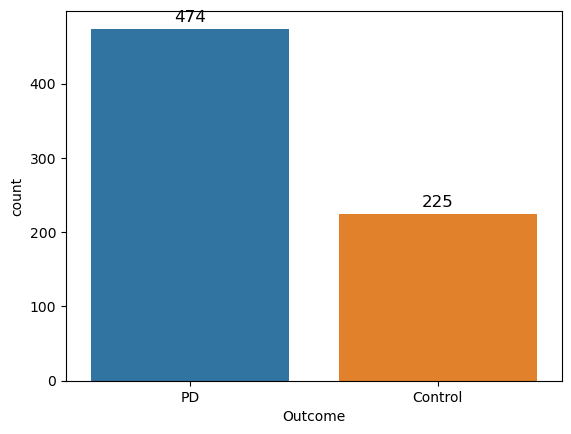

In [30]:
# Bar graph of amount of PD and Control samples
ax = sns.countplot(x=df_metabacteriamerge1['Outcome'])

# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

In [70]:
# Specify columns to apply the transformation
columns_to_convert = ['Sellimonas_intestinalis',
 'Eubacterium_siraeum',
 'Akkermansia_muciniphila',
 'Anaerostipes_hadrus',
 'Bacteroides_faecis',
 'Alistipes_putredinis',
 'Parabacteroides_goldsteinii',
 'Dialister_invisus',
 'Ruminococcus_bromii',
 'Blautia_producta',
 'Roseburia_inulinivorans',
 'Eubacterium_rectale',
 'Odoribacter_splanchnicus',
 'Butyricimonas_virosa',
 'Bacteroides_stercoris',
 'Bifidobacterium_adolescentis',
 'Parabacteroides_merdae',
 'Monoglobus_pectinilyticus',
 'Alistipes_finegoldii',
 'Collinsella_aerofaciens',
 'Fusicatenibacter_saccharivorans',
 'Bifidobacterium_longum',
 'Alistipes_shahii',
 'Parabacteroides_distasonis',
 'Bifidobacterium_pseudocatenulatum',
 'Gemmiger_formicilis',
 'Bacteroides_uniformis',
 'Lawsonibacter_asaccharolyticus',
 'Blautia_hansenii',
 'Faecalibacterium_prausnitzii',
 'Bacteroides_thetaiotaomicron',
 'Bacteroides_nordii',
 'Eubacterium_ramulus',
 'Blautia_hydrogenotrophica',
 'Bacteroides_xylanisolvens',
 'Acidaminococcus_intestini',
 'Eggerthella_lenta',
 'Ruminococcus_lactaris',
 'Bacteroides_eggerthii',
 'Roseburia_intestinalis',
 'Ruminococcus_bicirculans',
 'Coprococcus_catus',
 'Eisenbergiella_massiliensis',
 'Ruminococcus_torques',
 'Bacteroides_fragilis',
 'Bacteroides_finegoldii',
 'Roseburia_faecis',
 'Clostridium_leptum',
 'Bacteroides_ovatus',
 'Bacteroides_caccae',
 'Dorea_longicatena',
 'Clostridium_scindens',
 'Erysipelatoclostridium_ramosum',
 'Streptococcus_salivarius',
 'Blautia_obeum',
 'Escherichia_coli',
 'Bacteroides_salyersiae',
 'Clostridium_innocuum',
 'Bifidobacterium_bifidum',
 'Ruminococcus_gnavus',
 'Adlercreutzia_equolifaciens',
 'Bilophila_wadsworthia',
 'Coprococcus_comes',
 'Bacteroides_cellulosilyticus',
 'Lachnospira_pectinoschiza',
 'Streptococcus_thermophilus',
 'Phascolarctobacterium_faecium',
 'Barnesiella_intestinihominis',
 'Parasutterella_excrementihominis',
 'Hungatella_hathewayi',
 'Alistipes_onderdonkii',
 'Flavonifractor_plautii',
 'Dorea_formicigenerans',
 'Agathobaculum_butyriciproducens',
 'Ruthenibacterium_lactatiformans',
 'Bacteroides_intestinalis',
 'Alistipes_indistinctus',
 'Streptococcus_parasanguinis',
 'Eisenbergiella_tayi',
 'Clostridium_symbiosum',
 'Blautia_wexlerae',
 'Klebsiella_pneumoniae',
 'Roseburia_hominis']

# Apply the transformation: convert negatives to 0 and positives to 1
df_metabacteriamerge1[columns_to_convert] = df_metabacteriamerge1[columns_to_convert].applymap(lambda x: 0 if x < 0 else 1)

print(df_metabacteriamerge1)

     Sellimonas_intestinalis  Eubacterium_siraeum             Sample  \
8                          1                    1  UF-PF-2020-016-1N   
9                          1                    1  UF-PF-2020-017-1N   
11                         1                    1  UF-PF-2020-021-1N   
12                         1                    1  UF-PF-2020-022-1N   
13                         0                    1  UF-PF-2020-023-1N   
..                       ...                  ...                ...   
784                        1                    0              DP640   
785                        1                    1              DP641   
786                        0                    1              DP642   
787                        0                    1              DP644   
788                        1                    1              DP646   

    Taking Probiotics  Akkermansia_muciniphila  Anaerostipes_hadrus  \
8                   N                        1                  

C:\Users\jsny2\AppData\Local\Temp\ipykernel_11236\3554738351.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metabacteriamerge1[columns_to_convert] = df_metabacteriamerge1[columns_to_convert].applymap(lambda x: 0 if x < 0 else 1)


In [71]:
# Split the data into features (X) and Outcome (y)
X = df_metabacteriamerge1.drop('Outcome', axis=1)  # Features
y = df_metabacteriamerge1['Outcome']  # Outcome 

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [72]:
X_train = X_train.drop(['Sample'], axis = 1)
X_train

,Sellimonas_intestinalis,Eubacterium_siraeum,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Race/Ethnicity,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis
774,1,1,N,1,1,N,0,1,1,1,Y,1,0,0,1,1,1,N,1,0,1,0,1,1,1,N,1,1,Wallen,1,1,0,1,1,0,Y,N,1,0,1,0,0,0,0,1,0,0,0,0,Y,0,1,0,1,1,1,1,1,N,0,0,1,1,1,White,0,N,1,0,1,1,1,N,1,1,N,0,87.0,1,1,1,0,1,1,M,1,0,1,0,0,1,0,1,1,1,1,1,1,1
200,1,1,N,1,1,N,1,1,1,1,N,1,1,1,1,1,1,N,1,1,1,1,1,1,1,Y,1,1,Wallen,1,1,1,1,1,1,N,N,1,1,1,1,1,1,1,1,1,1,1,1,N,1,1,1,1,1,1,1,1,N,1,1,1,1,1,White,1,N,1,1,1,1,1,N,1,1,N,1,60.0,1,1,1,1,1,1,F,1,1,1,1,1,1,1,1,1,1,1,1,1,1
56,0,0,N,0,1,N,0,1,0,0,N,1,0,1,1,0,0,N,1,0,1,0,0,0,1,Y,1,0,Krueger,1,0,1,1,0,0,N,less than 10 years,1,0,0,1,0,0,0,0,1,0,0,0,N,0,0,1,0,1,1,0,0,N,0,1,0,0,0,White,1,Y,0,0,0,0,0,N,1,1,N,1,48.0,0,0,0,1,0,0,Male,0,1,0,1,0,0,0,0,0,0,0,1,0,0
149,1,1,N,1,1,Y,1,1,1,1,Y,1,1,1,1,1,1,N,1,1,1,1,1,1,1,Y,1,1,Wallen,1,1,1,1,1,1,N,N,1,1,1,1,1,1,1,1,1,1,1,1,N,1,1,1,1,1,1,1,1,N,1,1,1,1,1,White,1,N,1,1,1,1,1,N,1,1,Y,1,65.0,1,1,1,1,1,1,M,1,1,1,1,1,1,1,1,1,1,1,1,1,1
280,1,1,N,1,1,N,1,1,1,1,N,1,1,1,1,1,1,N,1,1,1,1,1,1,1,Y,1,1,Wallen,1,1,1,1,1,1,N,N,1,1,1,1,1,1,1,1,1,1,1,1,N,1,1,1,1,1,1,1,1,N,1,1,1,1,1,White,1,N,1,1,1,1,1,N,1,1,N,1,70.0,1,1,1,1,1,1,F,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,1,N,1,1,N,0,1,0,0,Y,1,0,1,1,1,1,N,1,0,1,0,1,1,1,N,1,1,Wallen,1,1,0,1,1,0,Y,N,1,1,0,1,1,0,0,0,1,0,0,0,N,1,0,1,0,1,1,1,1,N,0,1,0,0,1,White,1,N,1,0,0,0,0,N,1,0,Y,0,81.0,1,0,1,1,1,1,M,0,0,1,1,1,1,0,1,1,1,1,1,0,1
41,0,0,N,0,1,N,0,1,0,0,Y,1,0,1,1,1,1,N,0,1,1,0,0,1,1,Y,0,0,Krueger,1,0,1,1,1,0,N,never,1,1,0,1,1,1,1,1,1,0,1,1,Y,0,0,1,0,0,1,0,0,N,1,1,0,

In [73]:
# Assuming 'column_name' is your column with 'Y'/'N' values
X_train['Sex'] = X_train['Sex'].replace({'M': 1, 'Male': 1, 'F': 0, 'Female': 0})
X_train['Blood pressure meds'] = X_train['Blood pressure meds'].replace({'Y': 1, 'N': 0})
X_train['Thyroid meds'] = X_train['Thyroid meds'].replace({'Y': 1, 'N': 0})
X_train['Taking Probiotics'] = X_train['Taking Probiotics'].replace({'Y': 1, 'N': 0, 'Y ': 1, 'y': 1})
X_train['Depression/anxiety meds'] = X_train['Depression/anxiety meds'].replace({'Y': 1, 'N': 0})
X_train['Do_you_drink_caffeinated_beverages'] = X_train['Do_you_drink_caffeinated_beverages'].replace({'Y': 1, 'N': 0})
X_train['Sleep aids'] = X_train['Sleep aids'].replace({'Y': 1, 'N': 0})
X_train['Antihistamines'] = X_train['Antihistamines'].replace({'Y': 1, 'N': 0})
X_train['Diabetes meds'] = X_train['Diabetes meds'].replace({'Y': 1, 'N': 0})
X_train['Cholesterol meds'] = X_train['Cholesterol meds'].replace({'Y': 1, 'N': 0})
X_train['Blood thinners'] = X_train['Blood thinners'].replace({'Y': 1, 'N': 0})
X_train['Asthma/COPD meds'] = X_train['Asthma/COPD meds'].replace({'Y': 1, 'N': 0})
X_train['Study'] = X_train['Study'].replace({'Wallen': 1, 'Krueger': 0})
X_train['Smoking'] = X_train['Smoking'].replace({'N': 0, 'never': 0, 'less than 10 years': 1, 'Y': 1, 'between 10-20 years': 1, '20+ years': 1})
X_train

,Sellimonas_intestinalis,Eubacterium_siraeum,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Race/Ethnicity,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis
774,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,1,White,0,0,1,0,1,1,1,0,1,1,0,0,87.0,1,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1
200,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,White,1,0,1,1,1,1,1,0,1,1,0,1,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
56,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,White,1,1,0,0,0,0,0,0,1,1,0,1,48.0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
149,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,White,1,0,1,1,1,1,1,0,1,1,1,1,65.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
280,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,White,1,0,1,1,1,1,1,0,1,1,0,1,70.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,White,1,0,1,0,0,0,0,0,1,0,1,0,81.0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1
41,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,White,1,0,1,0,0,0,1,0,1,1,0,1,76.0,0,1,0,0,0,0,1,0,0,0,1,

In [74]:
# One-hot encode the 'Race' column
X_train = pd.get_dummies(X_train, columns=['Race/Ethnicity'])
X_train

,Sellimonas_intestinalis,Eubacterium_siraeum,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis,Race/Ethnicity_American Indian/Alaskan Native,Race/Ethnicity_Asian,Race/Ethnicity_Black or African American,Race/Ethnicity_More than one race,Race/Ethnicity_White
774,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,0,0,87.0,1,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1
200,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
56,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,48.0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
149,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,65.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
280,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,70.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,81.0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1


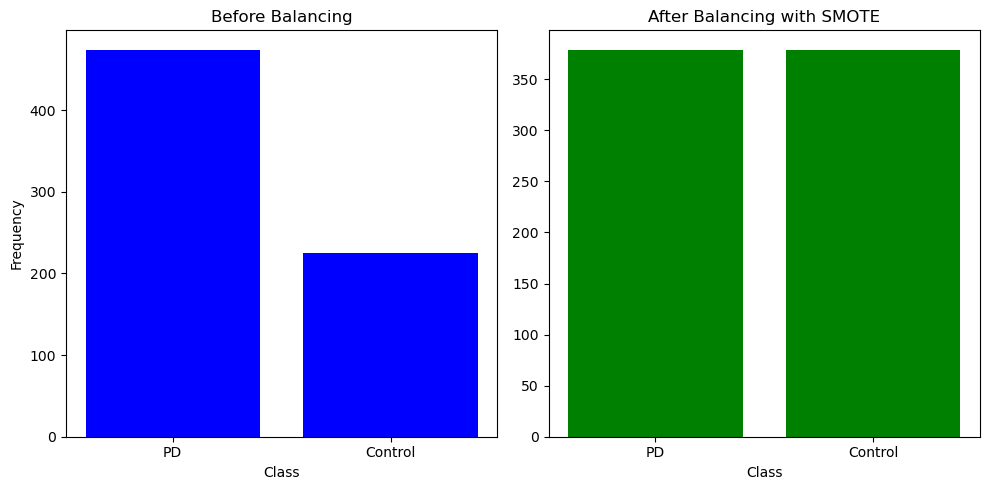

In [75]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Original and resampled class distributions
orig_counts = Counter(y)
resampled_counts = Counter(y_res)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Before balancing
axs[0].bar(orig_counts.keys(), orig_counts.values(), color='blue')
axs[0].set_title('Before Balancing')
axs[0].set_xticks([0, 1])
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')

# After balancing
axs[1].bar(resampled_counts.keys(), resampled_counts.values(), color='green')
axs[1].set_title('After Balancing with SMOTE')
axs[1].set_xticks([0, 1])
axs[1].set_xlabel('Class')

plt.tight_layout()
plt.show()

In [76]:
y_res_numeric = np.where(y_res == 'PD', 1, 0)
print(y_res_numeric)

[1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0
 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 

In [77]:
# Assuming 'column_name' is your column with 'Y'/'N' values
X_test['Sex'] = X_test['Sex'].replace({'M': 1, 'Male': 1, 'F': 0, 'Female': 0})
X_test['Blood pressure meds'] = X_test['Blood pressure meds'].replace({'Y': 1, 'N': 0})
X_test['Thyroid meds'] = X_test['Thyroid meds'].replace({'Y': 1, 'N': 0})
X_test['Taking Probiotics'] = X_test['Taking Probiotics'].replace({'Y': 1, 'N': 0, 'Y ': 1, 'y': 1})
X_test['Depression/anxiety meds'] = X_test['Depression/anxiety meds'].replace({'Y': 1, 'N': 0})
X_test['Do_you_drink_caffeinated_beverages'] = X_test['Do_you_drink_caffeinated_beverages'].replace({'Y': 1, 'N': 0})
X_test['Sleep aids'] = X_test['Sleep aids'].replace({'Y': 1, 'N': 0})
X_test['Antihistamines'] = X_test['Antihistamines'].replace({'Y': 1, 'N': 0})
X_test['Diabetes meds'] = X_test['Diabetes meds'].replace({'Y': 1, 'N': 0})
X_test['Cholesterol meds'] = X_test['Cholesterol meds'].replace({'Y': 1, 'N': 0})
X_test['Blood thinners'] = X_test['Blood thinners'].replace({'Y': 1, 'N': 0})
X_test['Asthma/COPD meds'] = X_test['Asthma/COPD meds'].replace({'Y': 1, 'N': 0})
X_test['Study'] = X_test['Study'].replace({'Wallen': 1, 'Krueger': 0})
X_test['Smoking'] = X_test['Smoking'].replace({'N': 0, 'never': 0, 'less than 10 years': 1, 'Y': 1, 'between 10-20 years': 1, '20+ years': 1})
X_test

,Sellimonas_intestinalis,Eubacterium_siraeum,Sample,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Race/Ethnicity,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis
324,0,1,DP027,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,White,1,0,1,1,0,1,0,0,1,1,0,1,66.0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1
253,0,1,DC244,0,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,White,1,0,1,0,0,0,1,0,1,1,0,1,78.0,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1
379,1,1,DP094,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,White,1,0,1,1,1,1,1,0,1,1,0,1,70.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
454,0,1,DP193,0,1,1,0,1,1,0,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,White,0,0,1,1,1,1,0,0,1,0,0,0,67.0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1
167,1,1,DC127,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,White,1,0,1,1,1,1,1,0,1,1,1,1,79.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,0,1,DP177,0,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,1,White,1,0,0,0,1,0,1,0,0,1,0,0,75.0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,1,0,1
306,1,1,DP005,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Wh

In [78]:
# One-hot encode the 'Race' column
X_test = pd.get_dummies(X_test, columns=['Race/Ethnicity'])
X_test

,Sellimonas_intestinalis,Eubacterium_siraeum,Sample,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis,Race/Ethnicity_Black or African American,Race/Ethnicity_White
324,0,1,DP027,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,0,1,66.0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1
253,0,1,DC244,0,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,78.0,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1
379,1,1,DP094,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,70.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
454,0,1,DP193,0,1,1,0,1,1,0,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,67.0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1
167,1,1,DC127,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,79.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,0,1,DP177,0,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,75.0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,1,0,1,0,1
306,1,1,DP005,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1

In [79]:
X_test['Race/Ethnicity_American Indian/Alaskan Native'] = 0
X_test['Race/Ethnicity_Asian'] = 0
X_test['Race/Ethnicity_More than one race'] = 0
X_test

,Sellimonas_intestinalis,Eubacterium_siraeum,Sample,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis,Race/Ethnicity_Black or African American,Race/Ethnicity_White,Race/Ethnicity_American Indian/Alaskan Native,Race/Ethnicity_Asian,Race/Ethnicity_More than one race
324,0,1,DP027,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,0,1,66.0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0
253,0,1,DC244,0,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,78.0,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0
379,1,1,DP094,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,70.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0
454,0,1,DP193,0,1,1,0,1,1,0,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,67.0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0
167,1,1,DC127,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,79.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,0,1,DP177,0,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,75.0,0,1,

In [80]:
X_test = X_test.drop(['Sample'], axis = 1)
X_test

,Sellimonas_intestinalis,Eubacterium_siraeum,Taking Probiotics,Akkermansia_muciniphila,Anaerostipes_hadrus,Antihistamines,Bacteroides_faecis,Alistipes_putredinis,Parabacteroides_goldsteinii,Dialister_invisus,Blood pressure meds,Ruminococcus_bromii,Blautia_producta,Roseburia_inulinivorans,Eubacterium_rectale,Odoribacter_splanchnicus,Butyricimonas_virosa,Diabetes meds,Bacteroides_stercoris,Bifidobacterium_adolescentis,Parabacteroides_merdae,Monoglobus_pectinilyticus,Alistipes_finegoldii,Collinsella_aerofaciens,Fusicatenibacter_saccharivorans,Do_you_drink_caffeinated_beverages,Bifidobacterium_longum,Alistipes_shahii,Study,Parabacteroides_distasonis,Bifidobacterium_pseudocatenulatum,Gemmiger_formicilis,Bacteroides_uniformis,Lawsonibacter_asaccharolyticus,Blautia_hansenii,Sleep aids,Smoking,Faecalibacterium_prausnitzii,Bacteroides_thetaiotaomicron,Bacteroides_nordii,Eubacterium_ramulus,Blautia_hydrogenotrophica,Bacteroides_xylanisolvens,Acidaminococcus_intestini,Eggerthella_lenta,Ruminococcus_lactaris,Bacteroides_eggerthii,Roseburia_intestinalis,Ruminococcus_bicirculans,Cholesterol meds,Coprococcus_catus,Eisenbergiella_massiliensis,Ruminococcus_torques,Bacteroides_fragilis,Bacteroides_finegoldii,Roseburia_faecis,Clostridium_leptum,Bacteroides_ovatus,Thyroid meds,Bacteroides_caccae,Dorea_longicatena,Clostridium_scindens,Erysipelatoclostridium_ramosum,Streptococcus_salivarius,Blautia_obeum,Depression/anxiety meds,Escherichia_coli,Bacteroides_salyersiae,Clostridium_innocuum,Bifidobacterium_bifidum,Ruminococcus_gnavus,Asthma/COPD meds,Adlercreutzia_equolifaciens,Bilophila_wadsworthia,Blood thinners,Coprococcus_comes,Age,Bacteroides_cellulosilyticus,Lachnospira_pectinoschiza,Streptococcus_thermophilus,Phascolarctobacterium_faecium,Barnesiella_intestinihominis,Parasutterella_excrementihominis,Sex,Hungatella_hathewayi,Alistipes_onderdonkii,Flavonifractor_plautii,Dorea_formicigenerans,Agathobaculum_butyriciproducens,Ruthenibacterium_lactatiformans,Bacteroides_intestinalis,Alistipes_indistinctus,Streptococcus_parasanguinis,Eisenbergiella_tayi,Clostridium_symbiosum,Blautia_wexlerae,Klebsiella_pneumoniae,Roseburia_hominis,Race/Ethnicity_Black or African American,Race/Ethnicity_White,Race/Ethnicity_American Indian/Alaskan Native,Race/Ethnicity_Asian,Race/Ethnicity_More than one race
324,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,0,1,66.0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0
253,0,1,0,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,78.0,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0
379,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,70.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0
454,0,1,0,1,1,0,1,1,0,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,67.0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0
167,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,79.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,0,1,0,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,75.0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,0

In [81]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your training and testing datasets

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Step 2: Standardize the training data
X_train_standardized = scaler.transform(X_train)

# Step 3: Standardize the test data based on the training data's mean and std
X_test_standardized = scaler.transform(X_test)

C:\Users\jsny2\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [82]:
# 1. Train Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_res, y_res_numeric)

LogisticRegression(max_iter=1000)

In [83]:
# 2. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_res, y_res_numeric)

RandomForestClassifier(random_state=42)

In [84]:
# 3. Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_res, y_res_numeric)

C:\Users\jsny2\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [85]:
# 4. Train SVM
#svm_model = SVC()
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_res, y_res_numeric)

SVC(probability=True)

In [86]:
# Evaluate the models using cross-validation (using accuracy for now)
log_reg_cv = cross_val_score(log_reg_model, X_res, y_res_numeric, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf_model, X_res, y_res_numeric, cv=5, scoring='accuracy')
xgb_cv = cross_val_score(xgb_model, X_res, y_res_numeric, cv=5, scoring='accuracy')
svm_cv = cross_val_score(svm_model, X_res, y_res_numeric, cv=5, scoring='accuracy')

C:\Users\jsny2\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jsny2\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jsny2\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jsny2\anaconda3\lib\site-packages\

In [87]:
# Print cross-validated accuracy scores
print("Logistic Regression Cross-Validated Accuracy:", log_reg_cv.mean())
print("Random Forest Cross-Validated Accuracy:", rf_cv.mean())
print("XGBoost Cross-Validated Accuracy:", xgb_cv.mean())
print("SVM Cross-Validated Accuracy:", svm_cv.mean())

Logistic Regression Cross-Validated Accuracy: 0.7402840711049146
Random Forest Cross-Validated Accuracy: 0.7877919135587312
XGBoost Cross-Validated Accuracy: 0.762765772046009
SVM Cross-Validated Accuracy: 0.5712704775182991


In [88]:
# Print detailed classification report for each model on the training data
log_reg_preds = log_reg_model.predict(X_res)
rf_preds = rf_model.predict(X_res)
xgb_preds = xgb_model.predict(X_res)
svm_preds = svm_model.predict(X_res)

In [89]:
print("\nClassification Report for Logistic Regression:\n", classification_report(y_res_numeric, log_reg_preds))
print("\nClassification Report for Random Forest:\n", classification_report(y_res_numeric, rf_preds))
print("\nClassification Report for XGBoost:\n", classification_report(y_res_numeric, xgb_preds))
print("\nClassification Report for SVM:\n", classification_report(y_res_numeric, svm_preds))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       379
           1       0.82      0.83      0.82       379

    accuracy                           0.82       758
   macro avg       0.82      0.82      0.82       758
weighted avg       0.82      0.82      0.82       758


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       379
           1       1.00      0.99      0.99       379

    accuracy                           0.99       758
   macro avg       0.99      0.99      0.99       758
weighted avg       0.99      0.99      0.99       758


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       379
           1       0.99      0.97      0.98       379

    accuracy                           0.98       758

In [90]:
y_test_numeric = np.where(y_test == 'PD', 1, 0)
print(y_test_numeric)

[1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1]


In [91]:
# Print detailed classification report for each model on the training data
log_reg_preds_test = log_reg_model.predict(X_test_standardized)
rf_preds_test = rf_model.predict(X_test_standardized)
xgb_preds_test = xgb_model.predict(X_test_standardized)
svm_preds_test = svm_model.predict(X_test_standardized)

C:\Users\jsny2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\jsny2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\jsny2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [93]:
# Step 4: Generate predicted probabilities for the test set
y_prob_rf = rf_model.predict_proba(X_test_standardized)[:, 1]  # Probabilities for the positive class
y_prob_rf

C:\Users\jsny2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.44, 0.36, 0.55, 0.53, 0.49, 0.44, 0.43, 0.39, 0.45, 0.54, 0.35,
       0.47, 0.56, 0.37, 0.54, 0.42, 0.54, 0.47, 0.45, 0.44, 0.39, 0.44,
       0.46, 0.47, 0.43, 0.5 , 0.48, 0.45, 0.42, 0.48, 0.44, 0.48, 0.49,
       0.52, 0.45, 0.48, 0.41, 0.48, 0.51, 0.44, 0.41, 0.5 , 0.48, 0.5 ,
       0.47, 0.43, 0.42, 0.38, 0.42, 0.54, 0.52, 0.53, 0.47, 0.45, 0.48,
       0.48, 0.43, 0.3 , 0.48, 0.37, 0.55, 0.34, 0.42, 0.43, 0.36, 0.5 ,
       0.37, 0.49, 0.44, 0.42, 0.54, 0.5 , 0.33, 0.35, 0.29, 0.48, 0.33,
       0.43, 0.48, 0.55, 0.45, 0.35, 0.32, 0.38, 0.43, 0.46, 0.45, 0.5 ,
       0.42, 0.41, 0.57, 0.44, 0.49, 0.41, 0.52, 0.54, 0.45, 0.31, 0.45,
       0.5 , 0.52, 0.33, 0.4 , 0.28, 0.44, 0.51, 0.45, 0.44, 0.49, 0.3 ,
       0.44, 0.53, 0.4 , 0.46, 0.49, 0.32, 0.48, 0.48, 0.49, 0.54, 0.42,
       0.48, 0.45, 0.49, 0.44, 0.42, 0.47, 0.37, 0.47, 0.54, 0.33, 0.49,
       0.42, 0.43, 0.54, 0.42, 0.4 , 0.33, 0.55, 0.38])

In [94]:
from sklearn.metrics import roc_curve, auc
# Step 5: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_numeric, rf_preds_test)
roc_auc = auc(fpr, tpr)

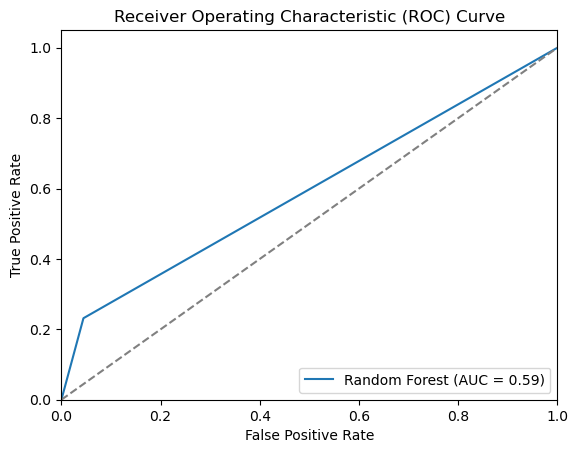

In [95]:
# Step 6: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Calculate metrics
conf_matrix = confusion_matrix(y_test_numeric, rf_preds_test)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = recall_score(y_test_numeric, rf_preds_test)  # Sensitivity (Recall)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test_numeric, rf_preds_test)
precision = precision_score(y_test_numeric, rf_preds_test)
f1 = f1_score(y_test_numeric, rf_preds_test, average = 'weighted')
roc_auc = roc_auc_score(y_test_numeric, rf_preds_test)  # AUC Score

# Create a dictionary to hold these values
metrics_dict = {
    "Metric": ["Sensitivity (Recall)", "Specificity", "Accuracy", "Precision", "F1 Score", "ROC AUC"],
    "Value": [sensitivity, specificity, accuracy, precision, f1, roc_auc]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,Metric,Value
0,Sensitivity (Recall),0.231579
1,Specificity,0.955556
2,Accuracy,0.464286
3,Precision,0.916667
4,F1 Score,0.422595
5,ROC AUC,0.593567


In [97]:
f1_logreg = f1_score(y_test_numeric, log_reg_preds_test, average='weighted')
f1_rf = f1_score(y_test_numeric, rf_preds_test, average='weighted')
f1_xgb = f1_score(y_test_numeric, xgb_preds_test, average='weighted')
f1_svm = f1_score(y_test_numeric, svm_preds_test, average='weighted')

In [98]:
f1_scores = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM'],
    'F1 Score': [f1_logreg, f1_rf, f1_xgb, f1_svm]
}

import pandas as pd
f1_df = pd.DataFrame(f1_scores)

# Display the table
print(f1_df)

# Finding the model with the highest F1 score
best_model = f1_df.loc[f1_df['F1 Score'].idxmax()]
print("\nModel with the highest F1 score:")
print(best_model)


                 Model  F1 Score
0  Logistic Regression  0.611658
1        Random Forest  0.422595
2              XGBoost  0.156371
3                  SVM  0.156371

Model with the highest F1 score:
Model       Logistic Regression
F1 Score               0.611658
Name: 0, dtype: object


In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_numeric, log_reg_preds_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[40  5]
 [50 45]]


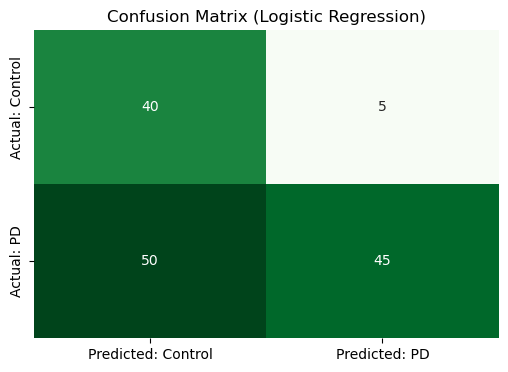

In [111]:
target_names = ['Control', 'PD']
confusion_df = pd.DataFrame(
    cm,
    index=[f"Actual: {name}" for name in target_names],
    columns=[f"Predicted: {name}" for name in target_names]
)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

In [112]:
unique_values, counts = np.unique(y_test_numeric, return_counts=True)

# Display results
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 45
Value: 1, Count: 95


In [113]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_res.columns.tolist()
# Create a dataframe to display the feature importance in a sorted manner
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print(feature_importance_df)

                                          Feature  Importance
76                                            Age    0.199631
83                                            Sex    0.127228
35                                     Sleep aids    0.052042
65                        Depression/anxiety meds    0.050863
10                            Blood pressure meds    0.029254
..                                            ...         ...
7                            Alistipes_putredinis    0.001308
95                               Blautia_wexlerae    0.001106
89                Ruthenibacterium_lactatiformans    0.000927
98  Race/Ethnicity_American Indian/Alaskan Native    0.000324
32                          Bacteroides_uniformis    0.000087

[103 rows x 2 columns]


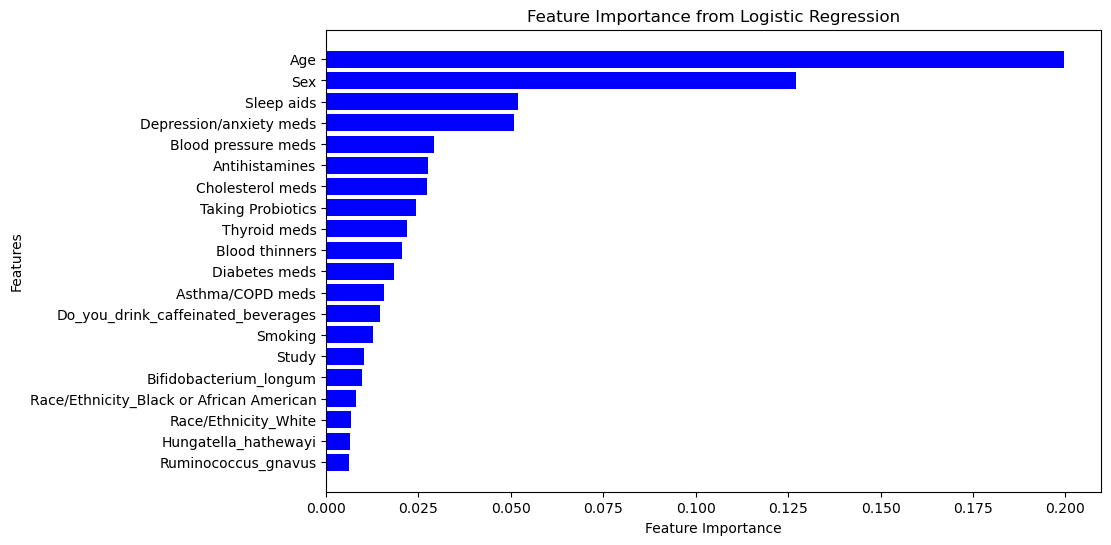

In [116]:
# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
df_10feature_importance = feature_importance_df.head(20)
# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_10feature_importance['Feature'], df_10feature_importance['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()